# Common code necessary to run

### Install packages

In [5]:
# !pip install tensorflow[and-cuda] --user
# !pip install pydot
# !pip install tensorflow
# !pip uninstall tensorflow -y
# !python3 -m pip install tensorflow[and-cuda] --user
# Verify the installation:
# !python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [2]:
print()

In [7]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession
# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [8]:
# import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [9]:
# if tf.test.is_gpu_available():
#     print("GPU is available")

# if tf.test.gpu_device_name():
#     print("GPU is being used for the current session")

In [10]:
# !pip install earthengine-api --user

after install package remember to restart kernel

## Login to GEE

## Define visualization palette

In [1]:
fire_vis = ['bbe029', '0a9501', '074b03']

landcover_vis = {
    "Evergreen Needleleaf Forests": "05450a",
    "Evergreen Broadleaf Forests": "086a10",
    "Deciduous Needleleaf Forests": "54a708",
    "Deciduous Broadleaf Forests": "78d203",
    "Mixed Forests": "009900",
    "Closed Shrublands": "c6b044",
    "Open Shrublands": "dcd159",
    "Woody Savannas": "dade48",
    "Savannas": "fbff13",
    "Grasslands": "b6ff05",
    "Permanent Wetlands": "27ff87",
    "Croplands": "c24f44",
    "Urban and Built-up Lands": "a5a5a5",
    "Cropland/Natural Vegetation Mosaics": "ff6d4c",
    "Permanent Snow and Ice": "69fff8",
    "Barren": "f9ffa4",
    "Water Bodies": "1c0dff",
}

temp_vis = [
    '040274', '040281', '0502a3', '0502b8', '0502ce', '0502e6',
    '0602ff', '235cb1', '307ef3', '269db1', '30c8e2', '32d3ef',
    '3be285', '3ff38f', '86e26f', '3ae237', 'b5e22e', 'd6e21f',
    'fff705', 'ffd611', 'ffb613', 'ff8b13', 'ff6e08', 'ff500d',
    'ff0000', 'de0101', 'c21301', 'a71001', '911003'
  ]

rain_vis = ['d8d8d8', '4addff', '5affa3', 'f2ff89', 'ff725c']


ndvi_vis = [
    'ffffff', 'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
    '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
    '012e01', '011d01', '011301'
  ]


# Global ALOS Landforms
# topo_vis = [
#     'red', 'red', 'blue', 'blue', 'blue', 'blue',
#     'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
#     'blue', 'blue', 'green', 'green', 'green', 'green',
#     'yellow', 'yellow', 'orange', 'red', 'red', 'red',
#     'red', 'red', 'red', 'red', 'red'
#   ]

cdem_vis = ['0905ff', 'ffefc4', 'ffffff']

windspeed_vis = ['ff00ff', '00ffff', 'ffff00']

soil_moisture_info_vis = ['ff5733', '1eae98', 'a693bf']

evapotranspiration_vis = ['0099cc', 'ffcc00', '9900cc']

## Define feature information

In [2]:
# FIRMS: Fire Information for Resource Management System
# 2000-2023 verified
# https://developers.google.com/earth-engine/datasets/catalog/FIRMS
fire_map_info = {
    'name':'FIRMS', 
    'band':'T21', 
    'min':325, 
    'max':400, 
    'vis':fire_vis, 
    'unmask':0,
    'is_label':-1,
}
fire_class_band = 'is_fire'


feature_list = []
# Terra Land Surface Temperature and Emissivity Daily Global 1km
# 2000-2023 verified
# https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD11A1
temp_map_info = {
    'name':'MODIS/061/MOD11A1', 
    'band':'LST_Day_1km', 
    'min':13000.0, 
    'max':16500.0, 
    'vis':temp_vis}
feature_list.append(temp_map_info)


# TerraClimate: Monthly Climate and Climatic Water Balance for Global Terrestrial Surfaces, 
# Precipitation accumulation 
# -2022.12 verified
# https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_TERRACLIMATE
rain_map_info = {
    'name':'IDAHO_EPSCOR/TERRACLIMATE', 
    'band':'pr', 
    'min':0, 
    'max':2000, 
    'vis':rain_vis}
feature_list.append(rain_map_info)


# MCD12Q1.061 MODIS Land Cover Type Yearly Global 500m, 
# 	Land Cover Type 1: Annual International Geosphere-Biosphere Programme (IGBP) classification
# -2022.1 verified
# https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MCD12Q1
landcover_map_info = {
    'name':'MODIS/061/MCD12Q1', 
    'band':'LC_Type1', 
    'min':1.0, 
    'max':17.0, 
    'vis':landcover_vis,
    'annual':True}
feature_list.append(landcover_map_info)


# MODIS Combined 16-Day NDVI
# 2000-2022.1 verified
# https://developers.google.com/earth-engine/datasets/catalog/MODIS_MCD43A4_006_NDVI
ndvi_map_info = {
    'name':'MODIS/MCD43A4_006_NDVI', 
    'band':'NDVI', 
    'min':0, 
    'max':1, 
    'vis':ndvi_vis}
feature_list.append(ndvi_map_info)

# The ALOS Landform dataset provides landform classes created by combining the Continuous Heat-Insolation Load Index (ALOS CHILI) and the multi-scale Topographic Position Index (ALOS mTPI) datasets. It is based on the 30m "AVE" band of JAXA's ALOS DEM (available in EE as JAXA/ALOS/AW3D30_V1_1).
# 2006-01-24T00:00:00Z–2011-05-13T00:00:00
# https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD11A1
# topo_map_info = {
#     'name': 'CSP/ERGo/1_0/Global/ALOS_landforms',
#     'band': 'constant',
#     'min': 11, 
#     'max': 42, 
#     'vis': 'topo_vis',
#     'unmask': -1,
#     'topo': -1,
# }
# feature_list.append(topo_map_info)


# The Canadian Digital Elevation Model (CDEM) is part of Natural Resources Canada's (NRCan) altimetry system and stems from the existing Canadian Digital Elevation Data (CDED). In these data, elevations can be either ground or reflective surface elevations.
# 1945-01-01T00:00:00Z–2011-01-01T00:00:00 verified
# https://developers.google.com/earth-engine/datasets/catalog/NRCan_CDEM#description
cdem_map_info = {
    'name': 'NRCan/CDEM',
    'band': 'elevation',
    'min': -226, 
    'max': 5944, 
    'vis': 'cdem_vis',
    'no_time': -1,
}
feature_list.append(cdem_map_info)


# TerraClimate: Monthly Climate and Climatic Water Balance for Global Terrestrial Surfaces
# -2022.12 verified
# https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_TERRACLIMATE
windspeed_map_info = {
    'name':'IDAHO_EPSCOR/TERRACLIMATE', 
    'band':'vs', 
    'min':0, 
    'max':2923, 
    'vis':windspeed_vis}
feature_list.append(windspeed_map_info)


# TerraClimate: Monthly Climate and Climatic Water Balance for Global Terrestrial Surfaces
# -2022.12 verified
# https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_TERRACLIMATE
soil_moisture_info = {
    'name':'IDAHO_EPSCOR/TERRACLIMATE', 
    'band':'soil', 
    'min':0, 
    'max':8882, 
    'vis':soil_moisture_info_vis}
feature_list.append(soil_moisture_info)


# TerraClimate: Monthly Climate and Climatic Water Balance for Global Terrestrial Surfaces
# -2022.12
# https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_TERRACLIMATE
evapotranspiration_info = {
    'name':'IDAHO_EPSCOR/TERRACLIMATE', 
    'band':'aet', 
    'min':0, 
    'max':3140, 
    'vis':evapotranspiration_vis}
feature_list.append(evapotranspiration_info)

In [15]:
pprint(len(feature_list))

8


## Define global variables

In [3]:
MONTH_SEASON = [[4,5,6],[7,8,9],[10,11,12]]
NAME_SEASON = ['Spring', 'Summer', 'Fall']
TRAIN_RANGE = [2018, 2019, 2020]
PREDICT_RANGE = [2021]
PRED_WINDOW = 2 #2 week prior to fire map to sample features

train_temporal_gap = 1 # 1 month

In [17]:
countries = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017")
Canada = countries.filter(ee.Filter.eq('country_na', 'Canada')).geometry()
America = countries.filter(ee.Filter.eq('country_na', 'United States')).geometry()

In [18]:
# Center in Vancouver
center = [-123.1207, 49.2827]

In [19]:
PATCH_SIZE = 128
SAMPLE_SCALE = 1000
SAMPLE_POINT = 400
SHARD_NUM = 10

In [4]:
BUCKET_NAME = 'wildfire-export'
TRAINING_FOLDER = 'training_export'
TEST_FOLDER = 'test_export'
TRAINING_OUTPUT_PATH = f'gs://{BUCKET_NAME}/{TRAINING_FOLDER}/'
TEST_OUTPUT_PATH = f'gs://{BUCKET_NAME}/{TEST_FOLDER}/'
MODEL_SAVE_PATH = f'gs://{BUCKET_NAME}/model/'

BUCKET_NAME = 'Capstone'
TRAINING_OUTPUT_PATH = f'./{TRAINING_FOLDER}/'
TEST_OUTPUT_PATH = f'./{TEST_FOLDER}/'
MODEL_SAVE_PATH = f'./model/'

In [5]:
def save_model(model_list, model_name):
    for i, model in enumerate(model_list):
        print(f"{MODEL_SAVE_PATH}{model_name}/{NAME_SEASON[i]}")
        model.save(f"{MODEL_SAVE_PATH}{model_name}/{NAME_SEASON[i]}")

In [6]:
def get_model_from_path(model_name):
    model_list = []
    for season_name in NAME_SEASON:
        model = tf.keras.models.load_model(f"{MODEL_SAVE_PATH}{model_name}/{season_name}")
        model_list.append(model)
    return model_list

In [7]:
def generate_predict_list(model_list, test_dataset_input_list):
    predict_label_list = []
    for season, model, inputs in zip(NAME_SEASON, model_list, test_dataset_input_list):
        predict_label = model.predict(inputs)
        predict_label_list.append(predict_label)
    return predict_label_list

In [24]:
# def process_img_value(img, map_info):
#     unmask_value = map_info['min'] - (map_info['max'] - map_info['min'])*0.1
#     return img.clamp(map_info['min'], map_info['max']).float().unmask(unmask_value)

# Data preprocessing

## Define helper functions

In [21]:
def get_range_start_from_month(year, month, gap=1):
    """
    Get a date range starting from a specified year and month and spanning a given number of months.

    Args:
    year (int): The starting year.
    month (int): The starting month (1 to 12).
    gap (int, optional): The number of months to span (default is 1).

    Returns:
    tuple: A tuple containing the start and end dates as ee.Date objects.
    """
    start = ee.Date(f'{year}-{month:02d}-01')
    end = start.advance(gap, 'month')
    return (start, end)


def get_range_from_year(year):
    """
    Get a date range for a given year.

    Args:
    year (int): The year for which you want to obtain a date range.

    Returns:
    tuple: A tuple containing two strings representing the start and end dates of the year, e.g., ('year-01-01', 'year-12-31').
    """
    return (f'{year}-01-01', f'{year}-12-31')

In [22]:
def sum_maps(map_info, start_date, end_date):
    """
    Aggregate monthly precipitation into an annual sum.

    Args:
    map_info (dict): A dictionary containing information about the Earth Engine ImageCollection, including 'name' and 'band'.
    start_date (str): The start date for filtering images (e.g., 'YYYY-MM-DD').
    end_date (str): The end date for filtering images (e.g., 'YYYY-MM-DD').

    Returns:
    ee.Image: An Earth Engine image representing the annual sum of precipitation.

    """
    collection = ee.ImageCollection(map_info['name']).filterDate(start_date, end_date).select(map_info['band'])
    img = collection.reduce(ee.Reducer.sum()).select(map_info['band']+'_sum')
    # pprint(img.getInfo())
    return img.rename(map_info['band'])

def median_maps(map_info, start_date, end_date):
    """
    Calculate the median of maps within a specified date range.

    Args:
    map_info (dict): A dictionary containing information about the Earth Engine ImageCollection, including 'name' and 'band'.
    start_date (str): The start date for filtering images (e.g., 'YYYY-MM-DD').
    end_date (str): The end date for filtering images (e.g., 'YYYY-MM-DD').

    Returns:
    ee.Image: An Earth Engine image representing the median of maps within the specified date range.

    """
    img = ee.ImageCollection(map_info['name']).filterDate(start_date, end_date).select(map_info['band']).median()
    # pprint(img.getInfo())
    return img

In [23]:
def max_maps(map_info, start_date, end_date):
    """
    Calculate the max of maps within a specified date range.

    Args:
    map_info (dict): A dictionary containing information about the Earth Engine ImageCollection, including 'name' and 'band'.
    start_date (str): The start date for filtering images (e.g., 'YYYY-MM-DD').
    end_date (str): The end date for filtering images (e.g., 'YYYY-MM-DD').

    Returns:
    ee.Image: An Earth Engine image representing the max of maps within the specified date range.

    """
    img = ee.ImageCollection(map_info['name']).filterDate(start_date, end_date).select(map_info['band']).max()
    # pprint(img.getInfo())
    return img

In [24]:
def get_img_from_collection(map_info, start_date, end_date):
    """
    Retrieve an image from a collection based on the specified map information, start date, and end date.

    Args:
    map_info (dict): A dictionary containing information about the Earth Engine ImageCollection.
    start_date (str or ee.Date): The start date for filtering images (e.g., 'YYY-MM-DD' or an ee.Date object).
    end_date (str or ee.Date): The end date for filtering images (e.g., 'YYYY-MM-DD' or an ee.Date object).

    Returns:
    ee.Image: An Earth Engine image representing the data from the specified collection and time period.
    
    """
    if map_info.get("is_label"):
        firms = max_maps(map_info, start_date, end_date).unmask(map_info['unmask']).divide(map_info['max'])
        renamed_image = firms.ceil().byte().clamp(0, 1).rename(fire_class_band)
        return renamed_image
    
    if map_info.get('topo'):
        return ee.Image(topo_map_info['topo'])
    
    if map_info.get('no_time'):
        img = ee.ImageCollection(cdem_map_info['name']).select(cdem_map_info['band']).median()
        return img
    
    if map_info.get('annual'):
        (start_date,end_date) = get_range_from_year(start_date.get('year').getInfo())
        
    if map_info.get('sum'):
        return sum_maps(map_info, start_date, end_date).float()
        # return sum_maps(map_info, start_date, end_date).float()
        
    return median_maps(map_info, start_date, end_date).float()
    # return median_maps(map_info, start_date, end_date).float()

In [25]:
def get_input_image(start_date, end_date) -> ee.Image:
    """
    Get a combined Earth Engine image from multiple collections for a specified time period.

    Args:
    start_date (str or ee.Date): The start date for filtering images (e.g., 'YYYY-MM-DD' or an ee.Date object).
    end_date (str or ee.Date): The end date for filtering images (e.g., 'YYYY-MM-DD' or an ee.Date object).

    Returns:
    ee.Image: A combined Earth Engine image containing data from multiple collections within the specified time period.

    """
    combined_image = get_img_from_collection(feature_list[0], start_date, end_date)
    for i in range(1, len(feature_list)):
        combined_image = ee.Image.cat([combined_image, get_img_from_collection(feature_list[i], start_date, end_date)])
    return combined_image

# print(get_input_image('2021-01-01', '2021-12-31').bandNames().getInfo())

In [26]:
def get_label_image(start_date, end_date) -> ee.Image:
    return get_img_from_collection(fire_map_info, start_date, end_date)
# print(get_label_image('2021-01-01', '2021-12-31').bandNames().getInfo())

In [27]:
def test_band():
    (start_date, end_date) = get_range_start_from_month(2021, 5, 1)
    # print(start_date)
    # print()
    # print(end_date)
    
    img = get_img_from_collection(fire_map_info, start_date, end_date)
    # print(img.getInfo())
    
    # img = ee.Image(topo_map_info['topo'])
    
    # img = ee.ImageCollection(fire_map_info['name'])\
    #     .filterDate(start_date,end_date)\
    #     .select(topo_map_info['band'])\
    #     .median()
    
    print(img.getInfo())
    # print(img.getInfo())
    # print(img.bandNames().getInfo())
test_band()

{'type': 'Image', 'bands': [{'id': 'is_fire', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 1}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}


## Visualize maps

In [28]:
# !jupyter trust Natural_Factors_Impacting_Carbon_Sequestration.ipynb

In [29]:
visualize_year = 2021
(visualize_start_date, visualize_end_date) = get_range_from_year(visualize_year)
(visualize_start_date, visualize_end_date)

('2021-01-01', '2021-12-31')

In [30]:
def get_tile_layer(map_info):
  if map_info.get('sum'):
    image = sum_maps(map_info, visualize_start_date, visualize_end_date)
  elif map_info.get("topo"):
    image = ee.Image(topo_map_info['topo'])
  else:
    image = median_maps(map_info, visualize_start_date, visualize_end_date)
  image=image.clip(Canada)
  vis_params = {
    'bands': [map_info['band']],
    'min': map_info['min'],
    'max': map_info['max'],
    }
  if isinstance(map_info['vis'], dict):
    vis_params['palette'] = list(map_info['vis'].values())
  else:
    vis_params['palette'] = map_info['vis']
  mapid = image.getMapId(vis_params)
  return folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name=map_info['band'],
  )

# map = folium.Map(location=(center[1], center[0]), zoom_start=7)
# for map_info in feature_list:
#   get_tile_layer(map_info).add_to(map)

# get_tile_layer(fire_map_info).add_to(map)

# folium.LayerControl().add_to(map)
# map

## Export data

In [31]:
# Each season samples from training year
def get_combined_image(is_training: bool):
    """
    Retrieve training data for multiple seasons, each sampling from training years.

    Returns:
    list: A list containing seasonal data with Earth Engine images, where each season is a list of images from training years and months
    
    """
    year_range = TRAIN_RANGE if is_training else PREDICT_RANGE
    combine_image_list = [] # Store 3 elements: spring, summer, fall
    for season in MONTH_SEASON:
      season_list = [] # Store all months for this season from all training years
      for month in season:
        for year in year_range:
          time_range=get_range_start_from_month(year, month)
          input_image = get_input_image(time_range[0], time_range[1])
          labels_image = get_label_image(time_range[0].advance(PRED_WINDOW, 'week'), time_range[1].advance(PRED_WINDOW, 'week'))
          combine_image = ee.Image.cat([input_image, labels_image])
          season_list.append(combine_image)
      combine_image_list.append(season_list)
    return combine_image_list

combine_image_list = get_combined_image(True)

tdd

In [32]:
def test_fire():
    Map = geemap.Map(center=[47.295, -119.086], zoom=6)
    combine_image_list = get_combined_image(True)
    # Create an empty list to store the test results
    test_results = []

    for season in combine_image_list:
        for month_image in season:
            test_img = month_image
            t21_test = test_img.select(fire_class_band)

            region = ee.Geometry.Point([-123.1207, 49.2827]).buffer(100009)
            num_samples = 100 

            samples = t21_test.stratifiedSample(
                region=region, 
                numPoints=50,
                classBand=fire_class_band,
                scale=1000)
            sample_values = samples.aggregate_array(fire_class_band)
            lst = sample_values.getInfo()

            # contains_non_zero = any(element != 0 for element in lst)
            value_counts = {value: lst.count(value) for value in set(lst)}

            test_results.append(value_counts)        
    print(test_results)
    
# test_fire()

In [33]:
import time
import random


def sample_points(
    region: ee.Geometry, num_points: int, scale: int, is_training: bool
):
    """
    Sample points from Earth Engine images and export them to Cloud Storage in TFRecord format.

    Args:
    region (ee.Geometry): An Earth Engine geometry representing the region of interest.
    num_points (int): The total number of points to sample.
    scale (int): The scale at which to sample the points.
    """
    random.seed(int(time.time()))

    sample_shards = 10
    num_points /= sample_shards
    combine_image_list = get_combined_image(is_training)
    export_folder = TRAINING_FOLDER if is_training else TEST_FOLDER
    for i, season in enumerate(combine_image_list):
        for j, month_image in enumerate(season):
            collection = ee.FeatureCollection([])
            for k in range(sample_shards):
                fc = month_image.stratifiedSample(
                    numPoints=num_points,
                    classBand=fire_class_band,
                    region=region,
                    scale=scale,
                    seed=int(random.random() * time.time())+i+j+k
                )
                collection = collection.merge(fc)
                
            task = ee.batch.Export.table.toCloudStorage(
                collection = collection,
                description = f'{NAME_SEASON[i]}-{j}',
                bucket = BUCKET_NAME,
                fileNamePrefix = f'{export_folder}/{NAME_SEASON[i]}-{j}',
                fileFormat = 'TFRecord'
            )
            # task.start()

### Export training data

In [34]:
sample_points(Canada, SAMPLE_POINT, SAMPLE_SCALE, True)

### Export test data

In [35]:
sample_points(Canada, SAMPLE_POINT, SAMPLE_SCALE, False)

# Training

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

NUM_INPUTS = len(feature_list)
LABEL = fire_class_band
BANDS = []
for feature in feature_list:
  BANDS += [feature['band']]
FEATURE_NAMES = BANDS + [LABEL]

columns = [tf.io.FixedLenFeature(shape=[], dtype=tf.float32) for k in FEATURE_NAMES]
# columns.append(tf.io.FixedLenFeature(shape=[], dtype=tf.int64))
FEATURES_DICT = dict(zip(FEATURE_NAMES, columns))
print(FEATURES_DICT)

BATCH_SIZE = 32

{'LST_Day_1km': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'pr': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'LC_Type1': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'NDVI': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'elevation': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'vs': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'soil': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'aet': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'is_fire': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None)}


In [14]:
fixed_range = []
for feature in feature_list:
    feature_range = [feature['min'], feature['max']]
    fixed_range.append(feature_range)
# fixed_range.append([0,1]) # after divide and byte new bands is 0, 1
normed_range = [[-1,1]]
print(fixed_range)

[[13000.0, 16500.0], [0, 2000], [1.0, 17.0], [0, 1], [-226, 5944], [0, 2923], [0, 8882], [0, 3140]]


In [15]:
def normalize_fixed(x, current_range, normed_range):
    """
    Normalize a value within a specific range to another range.

    Args:
    x: The value to be normalized.
    current_range: A list containing the minimum and maximum values of the current range.
    normed_range: A list containing the minimum and maximum values of the target range.

    Returns:
    The normalized value within the target range.
    """
    current_min, current_max = current_range[:,0], current_range[:,1]
    normed_min, normed_max = normed_range[:,0], normed_range[:,1]
    x_normed = (x - current_min) / (current_max - current_min)
    x_normed = x_normed * (normed_max - normed_min) + normed_min
    return x_normed

# normalize_fixed(np.array([5.0,5.0]),np.array([[0.0,10.0],[0.0,10.0]]), np.array([[0.0,1.0]]))

## Parse tfrecord

In [16]:
# from prettytable import PrettyTable
# import tensorflow_datasets as tfds

# def visualize_dataset(dataset):
#     dataset_len = dataset.reduce(np.int64(0), lambda x, _: x + 1).numpy()
#     print(f'dataset len: {dataset_len}')
#     ds_numpy = tfds.as_numpy(dataset)
#     x = PrettyTable()
#     # x.field_names = [key for key in FEATURE_NAMES]
#     for row in ds_numpy:
#         x.add_row(row)
#     print(x)

In [17]:
def test_balance_dataset(dataset):
    cnt_0 = 0
    cnt_1 = 0
    for inputs, label in dataset.as_numpy_iterator():
        cnt_0 += (1 if label == 0 else 0)
        cnt_1 += (1 if label == 1 else 0)
    
    print(f'cnt 0={cnt_0}, cnt_1={cnt_1}')

In [18]:
def parse_tfrecord(example_proto):
    """The parsing function.
    Read a serialized example into the structure defined by FEATURES_DICT.
    Args:
    example_proto: a serialized Example.
    Returns:
    A dictionary of tensors, keyed by feature name.
    """
    parsed_features = tf.io.parse_single_example(example_proto, FEATURES_DICT)
    # print(f'Parsed features: {parsed_features}')
    return parsed_features

def to_tuple(inputs, deb=True):
    """Function to convert a dictionary of tensors to a tuple of (inputs, outputs).
    Turn the tensors returned by parse_tfrecord into a stack in HWC shape.
    Args:
    inputs: A dictionary of tensors, keyed by feature name.
    Returns:
    A tuple of (inputs, outputs).
    """
    feature_list = [inputs.get(key) for key in BANDS]
    feature_stacked = tf.stack(feature_list, axis=0)

    # Convert from CHW to HWC
    # See https://caffe2.ai/docs/tutorial-image-pre-processing.html
    # feature_stacked = tf.transpose(feature_stacked, [1, 2, 0])
    feature_stacked = normalize_fixed(feature_stacked, np.array(fixed_range, dtype="float32"), np.array(normed_range, dtype="float32"))
    
    label = inputs.get(LABEL)
    label = 1 if label > 0.5 else 0
    # label_list = tf.transpose(label_list, [1, 2, 0])
    
    return feature_stacked, label

def get_dataset(pattern):
    """Function to read, parse and format to tuple a set of input tfrecord files.
    Get all the files matching the pattern, parse and convert to tuple.
    Args:
    pattern: A file pattern to match in a Cloud Storage bucket.
    Returns:
    A tf.data.Dataset
    """
    print(pattern)
    glob = tf.io.gfile.glob(pattern)
    dataset = tf.data.TFRecordDataset(glob, compression_type='GZIP')
    dataset = dataset.map(parse_tfrecord, num_parallel_calls=5)
    dataset = dataset.map(to_tuple, num_parallel_calls=5)
    return dataset

In [19]:
dataset_spring = get_dataset(f'{TRAINING_OUTPUT_PATH}Spring*')
test_balance_dataset(dataset_spring)

./training_export/Spring*
cnt 0=3600, cnt_1=3600


In [20]:
dataset_summer = get_dataset(f'{TRAINING_OUTPUT_PATH}Summer*')
dataset_fall = get_dataset(f'{TRAINING_OUTPUT_PATH}Fall*')
test_balance_dataset(dataset_summer)
test_balance_dataset(dataset_fall)

./training_export/Summer*
./training_export/Fall*
cnt 0=3600, cnt_1=3600
cnt 0=3600, cnt_1=3600


In [21]:
TRAIN_EVAL_RATIO = 80  # percent for training, the rest for testing

def split_dataset(dataset: tf.data.Dataset, batch_size) -> tuple[tf.data.Dataset, tf.data.Dataset]:
    """
    Splits a TensorFlow dataset into training and evaluation datasets.

    Args:
        dataset (tf.data.Dataset): The input dataset to be split.
        batch_size (int): The batch size for creating batches of data.

    Returns:
        tuple[tf.data.Dataset, tf.data.Dataset]: A tuple containing the training and evaluation datasets.
    """
    dataset_shuffle = dataset.shuffle(1)
    indexed_dataset = dataset_shuffle.enumerate()  # add an index to each example
    train_dataset = (
        indexed_dataset.filter(lambda i, _: i % 100 <= TRAIN_EVAL_RATIO)
        .map(lambda _, data: data)  # remove index
        .shuffle(batch_size * 8)  # randomize the examples for the batches
        .batch(batch_size)  # batch randomized examples
    )
    eval_dataset = (
        indexed_dataset.filter(lambda i, _: i % 100 > TRAIN_EVAL_RATIO)
        .map(lambda _, data: data, num_parallel_calls=tf.data.AUTOTUNE)  # remove index
        .batch(batch_size)  # batch the parsed examples, no need to shuffle
    )
    return (train_dataset, eval_dataset)

### Balance sanity check

In [22]:
def verify_train_eval_label(dataset, dataset_name):
    num_0 = 0
    num_1 = 0
    for element in dataset.as_numpy_iterator():
        num_1 += np.count_nonzero(element[1])
        num_0 += len(element[1]) - np.count_nonzero(element[1])
        
    print(f'{dataset_name} count_0 = {num_0}, count_1 = {num_1}')

In [23]:
dataset_all_seasons = [dataset_spring, dataset_summer, dataset_fall]
train_dataset_list = []
eval_dataset_list = []

for dataset in dataset_all_seasons:
    (train_season, eval_season) = split_dataset(dataset, batch_size=32)
    train_dataset_list.append(train_season)    
    eval_dataset_list.append(eval_season)

In [24]:
def balance_sanity_check():
    for train_season, eval_season in zip(train_dataset_list, eval_dataset_list):
        verify_train_eval_label(train_season, 'train')
        verify_train_eval_label(eval_season, 'eval')
balance_sanity_check()

train count_0 = 2916, count_1 = 2916
eval count_0 = 684, count_1 = 684
train count_0 = 2916, count_1 = 2916
eval count_0 = 684, count_1 = 684
train count_0 = 2916, count_1 = 2916
eval count_0 = 684, count_1 = 684


### Convert dataset to dataframe for ML

In [36]:
import pandas as pd

def convert_dataset_to_dataframe(dataset):
    """
    Converts a TensorFlow dataset to a Pandas DataFrame.

    Args:
    dataset (tf.data.Dataset): A TensorFlow dataset containing feature-label pairs.

    Returns:
    pd.DataFrame: A Pandas DataFrame with feature and label columns. 
    """
    data_dict = {'features': [], 'labels': []}
    
    for x, y in dataset:
        features = x.numpy()
        labels = y.numpy()
        
        data_dict['features'].extend(features)
        data_dict['labels'].extend(labels)
    
    df = pd.DataFrame(data_dict)
    
    labels_df = df['labels']
    df = pd.DataFrame(df['features'].to_list(), columns=['temp', 'rain', 'landcover', 'ndvi', 'cdem', 'windspeed', 'soil', 'evapotranspiration'])
    df['labels'] = labels_df                              
    
    return df


train_df = [convert_dataset_to_dataframe(dataset) for dataset in train_dataset_list]
eval_df = [convert_dataset_to_dataframe(dataset) for dataset in eval_dataset_list]

In [37]:
train_df[-1]['labels']

0       1
1       1
2       0
3       0
4       0
       ..
5827    0
5828    1
5829    1
5830    0
5831    0
Name: labels, Length: 5832, dtype: int32

## Define plot metrics

In [95]:
import matplotlib.pyplot as plt

def plot_metrics(history, metric_name, plot_title):
    if metric_name not in history.history:
        return
    plt.figure(figsize=(6, 4))
    plt.plot(history.history[metric_name], label=f'training {metric_name}')
    plt.plot(history.history[f'val_{metric_name}'], label=f'validation {metric_name}')
    plt.xlabel('Epoch')
    plt.ylabel(f'{metric_name}')
    plt.title(f'Training and Validation {plot_title} {metric_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Model fitting

## Mia - ANN


In [26]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.losses as losses
import tensorflow.keras.models as models
import tensorflow.keras.metrics as metrics
import tensorflow.keras.optimizers as optimizers

In [53]:
all_metric_names = ['Accuracy', 'Recall', 'AUC', 'FalseNegatives']
def plot_model_history(history, plot_title):
    for metric_name in all_metric_names:
        plot_metrics(history, metric_name, plot_title)

In [28]:
def train_ann_model(model, train_dataset, eval_dataset, epochs = 10):
    # Compile Model
    model.compile(optimizer = 'adam', metrics=[
        tf.keras.metrics.BinaryAccuracy(name=all_metric_names[0]), 
        tf.keras.metrics.Recall(name=all_metric_names[1]),
        tf.keras.metrics.AUC(name=all_metric_names[2]),
        tf.keras.metrics.FalseNegatives(name=all_metric_names[3])], 
        loss ='binary_crossentropy',
        )
    # Train Model
    history = model.fit(train_dataset, validation_data = eval_dataset, epochs = epochs)
    return model, history

### ANN baseline model

In [30]:
def get_ann_baseline_model():
  model = tf.keras.Sequential()
  # input layer + 1st hidden layer
  model.add(layers.Dense(32, input_dim=NUM_INPUTS, activation='relu', name='Dense1'))
  # hidden layer
  model.add(layers.Dense(16, activation='relu', name='Dense2'))
  # output layer
  model.add(layers.Dense(1, activation = 'sigmoid', name='Output'))
  model.summary()
  tf.keras.utils.plot_model(model, show_shapes=True)
  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 32)                288       
                                                                 
 Dense2 (Dense)              (None, 16)                528       
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/20
183/183 [==============================] - 3s 13ms/step - loss: 0.6000 - Accuracy: 0.6795 - Recall: 0.6632 - AUC: 0.7517 - FalseNegatives: 982.0000 - val_loss: 0.

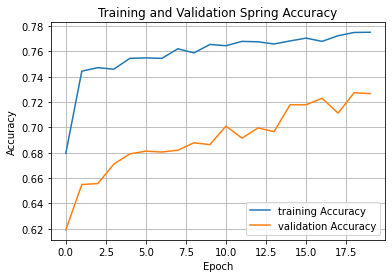

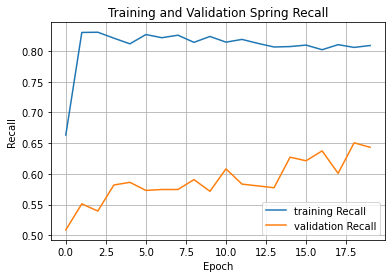

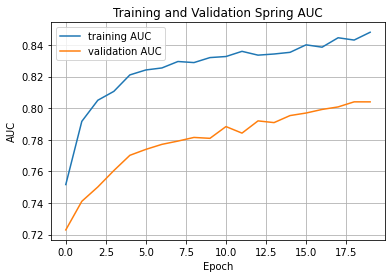

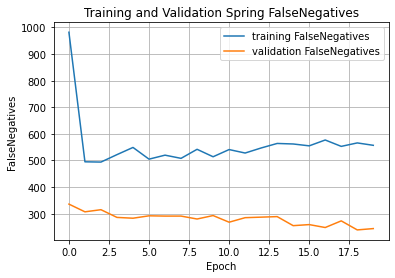

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 32)                288       
                                                                 
 Dense2 (Dense)              (None, 16)                528       
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/20
183/183 [==============================] - 3s 11ms/step - loss: 0.6201 - Accuracy: 0.6281 - Recall: 0.6578 - AUC: 0.7014 - FalseNegatives: 998.0000 - val_loss: 0.

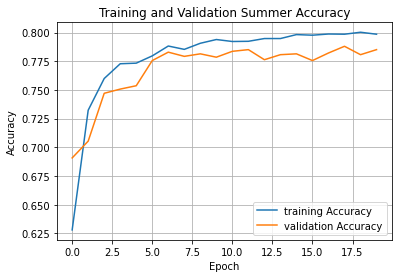

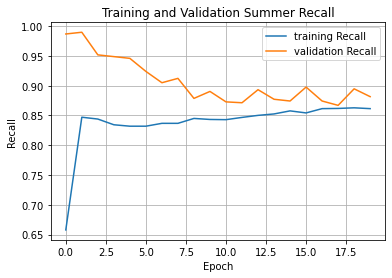

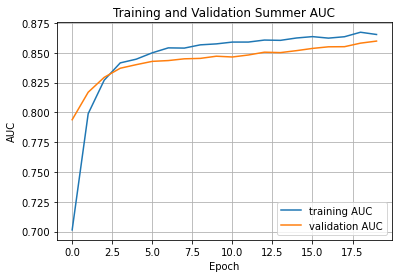

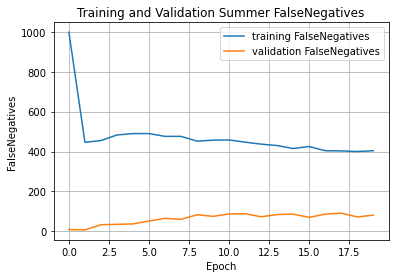

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 32)                288       
                                                                 
 Dense2 (Dense)              (None, 16)                528       
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/20
183/183 [==============================] - 3s 12ms/step - loss: 0.5910 - Accuracy: 0.6965 - Recall: 0.6207 - AUC: 0.7853 - FalseNegatives: 1106.0000 - val_loss: 0

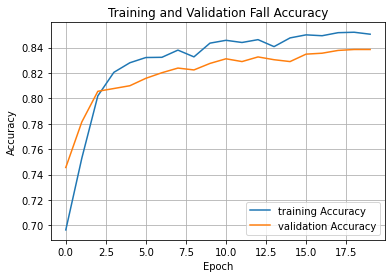

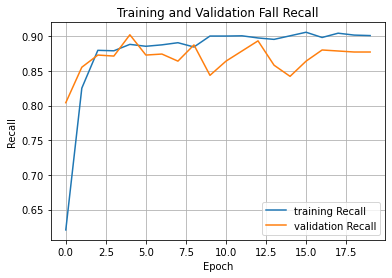

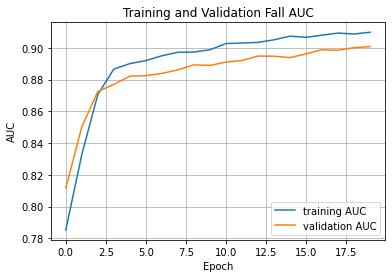

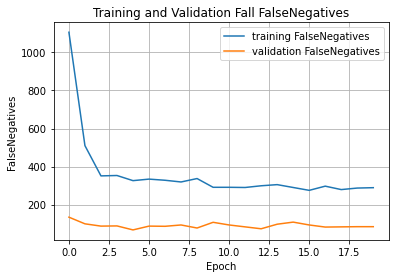

In [33]:
model_ann_baseline_list = []
for i, (train_dataset, eval_dataset) in enumerate(zip(train_dataset_list, eval_dataset_list)):
    tf.keras.backend.clear_session()
    model_ann_baseline, history_baseline = train_ann_model(get_ann_baseline_model(), train_dataset, eval_dataset,epochs = 20)
    model_ann_baseline_list.append(model_ann_baseline)
    plot_model_history(history_baseline, NAME_SEASON[i])
    # break

In [34]:
save_model(model_ann_baseline_list, "model_ann_baseline")

./model/model_ann_baseline/Spring


INFO:tensorflow:Assets written to: ./model/model_ann_baseline/Spring/assets


INFO:tensorflow:Assets written to: ./model/model_ann_baseline/Spring/assets


./model/model_ann_baseline/Summer


INFO:tensorflow:Assets written to: ./model/model_ann_baseline/Summer/assets


INFO:tensorflow:Assets written to: ./model/model_ann_baseline/Summer/assets


./model/model_ann_baseline/Fall


INFO:tensorflow:Assets written to: ./model/model_ann_baseline/Fall/assets


INFO:tensorflow:Assets written to: ./model/model_ann_baseline/Fall/assets


### ANN deeper model

In [36]:
def get_ann_deeper_model():
    model = tf.keras.Sequential()
    init_filter = 128
    cur_filter = init_filter/2
    cur_layer = 1
    # input layer + 1st hidden layer
    model.add(layers.Dense(init_filter, input_dim=NUM_INPUTS, activation='relu', name='Dense0'))
    # hidden layer
    while(cur_layer < 5):
        model.add(layers.Dense(cur_filter, activation='relu', name=f'Dense{cur_layer}'))
        model.add(layers.Dropout(0.2))
        model.add(layers.BatchNormalization())
        # cur_filter /= 2
        cur_layer += 1
    # output layer
    model.add(layers.Dense(1, activation = 'sigmoid', name='Output'))
    model.summary()
    tf.keras.utils.plot_model(model, show_shapes=True)
    return model

# get_ann_deeper_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense0 (Dense)              (None, 128)               1152      
                                                                 
 Dense1 (Dense)              (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 Dense2 (Dense)              (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

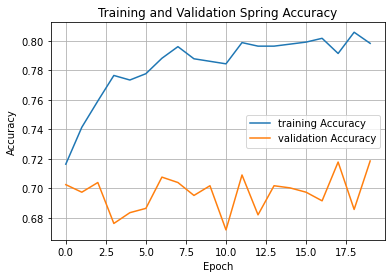

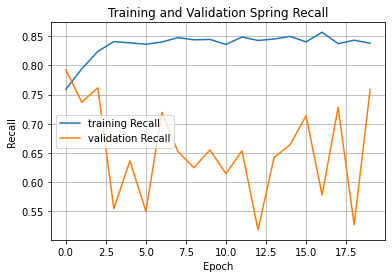

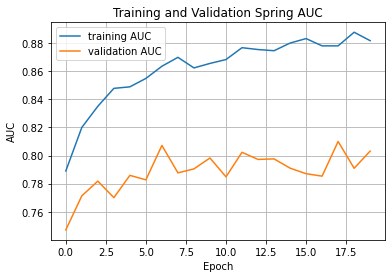

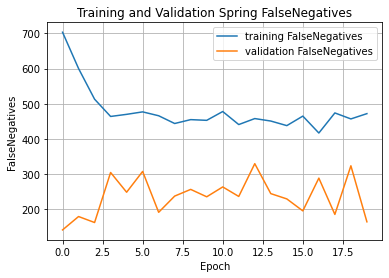

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense0 (Dense)              (None, 128)               1152      
                                                                 
 Dense1 (Dense)              (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 Dense2 (Dense)              (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

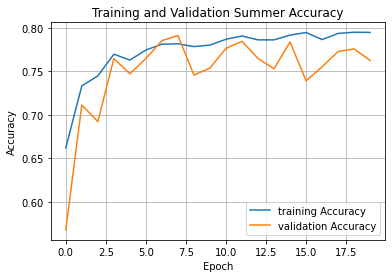

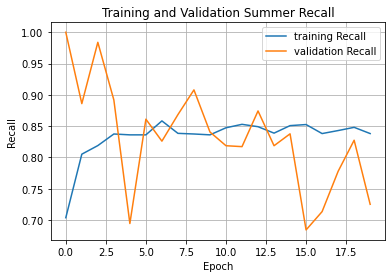

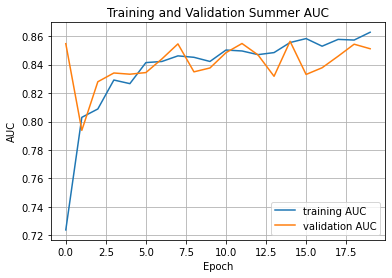

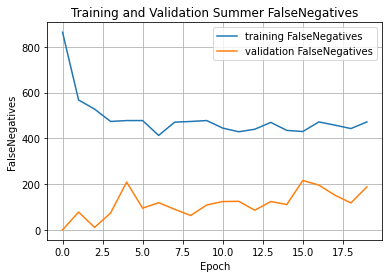

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense0 (Dense)              (None, 128)               1152      
                                                                 
 Dense1 (Dense)              (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 Dense2 (Dense)              (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

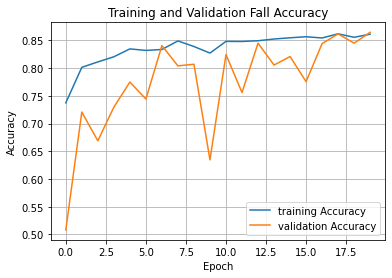

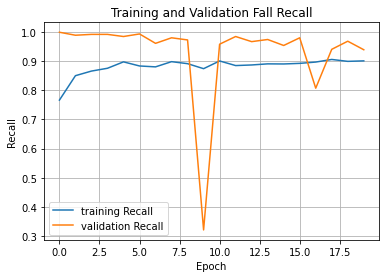

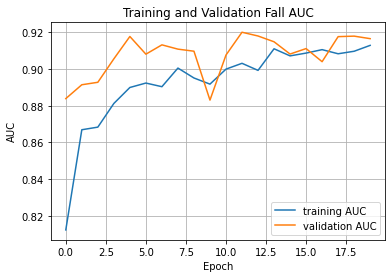

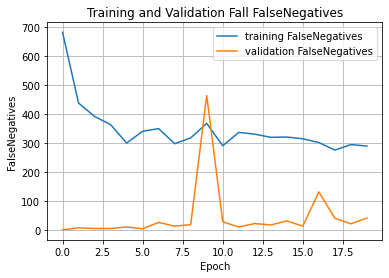

In [37]:
model_ann_deep_list = []
for i, (train_dataset, eval_dataset) in enumerate(zip(train_dataset_list, eval_dataset_list)):
    tf.keras.backend.clear_session()
    model_ann_deep, history_ann_deep = train_ann_model(get_ann_deeper_model(), train_dataset, eval_dataset, epochs=20)
    model_ann_deep_list.append(model_ann_deep)
    plot_model_history(history_ann_deep, NAME_SEASON[i])
    # break

In [38]:
save_model(model_ann_deep_list, "model_ann_deep")

./model/model_ann_deep/Spring


INFO:tensorflow:Assets written to: ./model/model_ann_deep/Spring/assets


INFO:tensorflow:Assets written to: ./model/model_ann_deep/Spring/assets


./model/model_ann_deep/Summer


INFO:tensorflow:Assets written to: ./model/model_ann_deep/Summer/assets


INFO:tensorflow:Assets written to: ./model/model_ann_deep/Summer/assets


./model/model_ann_deep/Fall


INFO:tensorflow:Assets written to: ./model/model_ann_deep/Fall/assets


INFO:tensorflow:Assets written to: ./model/model_ann_deep/Fall/assets


# Prediction

## Prepraing Test Data

In [128]:
test_dataset_input_list = []
test_dataset_label_list = []
for season_name in NAME_SEASON:
    dataset = get_dataset(f'{TEST_OUTPUT_PATH}{season_name}*')
    # dataset.map(lambda input,label: tf.expand_dims(input, axis=0),label)
    # test_dataset_input_list.append(dataset)    
    dataset_input = dataset.map(lambda input,_: tf.expand_dims(input, axis=0))
    print(dataset_input)
    dataset_label = dataset.map(lambda _,label: label)
    test_dataset_input_list.append(dataset_input)    
    test_dataset_label_list.append(dataset_label)

NameError: name 'get_dataset' is not defined

In [129]:
test_dataset_spring = get_dataset(f'{TEST_OUTPUT_PATH}Spring*')
test_dataset_summer = get_dataset(f'{TEST_OUTPUT_PATH}Summer*')
test_dataset_fall = get_dataset(f'{TEST_OUTPUT_PATH}Fall*')
test_balance_dataset(test_dataset_spring)
test_balance_dataset(test_dataset_summer)
test_balance_dataset(test_dataset_fall)

NameError: name 'get_dataset' is not defined

In [96]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import tensorflow.keras.metrics as metrics

def plot_confusion_matrix(test_dataset_label_list, predict_label_list_ann):
    """
    Plot confusion matrices for each pair of real and predicted labels in the given datasets.

    Args:
    test_dataset_label_list (list of tf.Tensor): A list of TensorFlow tensors containing real labels.
    predict_label_list_ann (list of tf.Tensor): A list of TensorFlow tensors containing predicted labels.

    """
    metric_list = [metrics.Recall(name = 'Recall'), metrics.BinaryAccuracy(name = 'Accuracy')]
    for real_labels, predict_labels in zip(test_dataset_label_list, predict_label_list_ann):
        predicted = np.array([1 if x >= 0.5 else 0 for x in predict_labels])
        actual = np.array([x for x in real_labels])
        
        for m in metric_list:
            m.update_state(actual, predicted)
            print(f'{m.name}: {m.result()}')
        
        conf_mat = confusion_matrix(actual, predicted)
        displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
        displ.plot()

## Mia - ANN

### ANN baseline model

In [46]:
model_ann_baseline_list = get_model_from_path('model_ann_baseline')

In [47]:
predict_label_list_ann_baseline = generate_predict_list(model_ann_baseline_list, test_dataset_input_list)

2400/2400 [==============================] - 3s 1ms/step


Recall: 0.6783333420753479
Accuracy: 0.7395833134651184
Recall: 0.7987499833106995
Accuracy: 0.7639583349227905
Recall: 0.7691666483879089
Accuracy: 0.7490277886390686


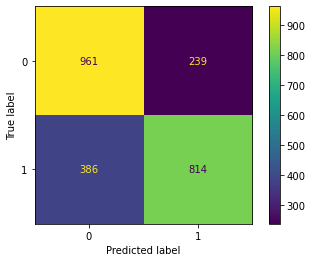

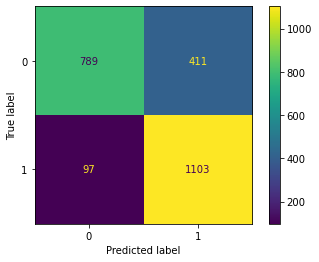

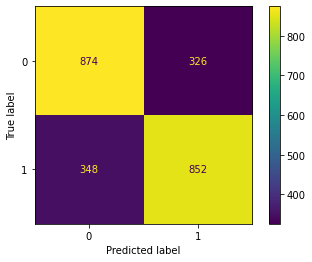

In [48]:
plot_confusion_matrix(test_dataset_label_list, predict_label_list_ann_baseline)

### ANN deeper model

In [49]:
model_ann_deep_list = get_model_from_path('model_ann_deep')

In [50]:
predict_label_list_ann_deep = generate_predict_list(model_ann_deep_list, test_dataset_input_list)

2400/2400 [==============================] - 3s 1ms/step


Recall: 0.875
Accuracy: 0.7758333086967468
Recall: 0.8104166388511658
Accuracy: 0.7668750286102295
Recall: 0.7761111259460449
Accuracy: 0.7506944537162781


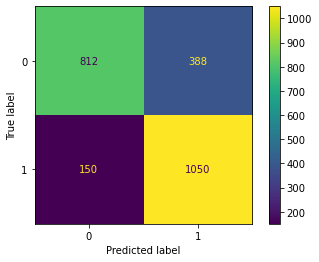

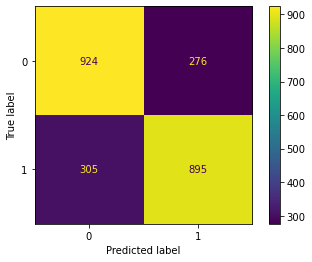

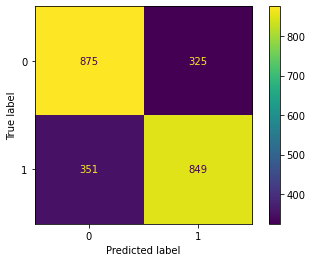

In [51]:
plot_confusion_matrix(test_dataset_label_list, predict_label_list_ann_deep)

### Feature importance analysis

In [52]:
np_test_input = np.asarray(list(test_dataset_input_list[0]))
np_test_input.shape

(2400, 1, 8)

In [53]:
def analyze_feature_importance(model, test_input, test_label, model_name, season_name, convert_back_to_tf_dataset: bool):
    results = []
    if convert_back_to_tf_dataset:
        pred = model.predict(tf.data.Dataset.from_tensor_slices(test_input), verbose=0).squeeze()
    else:
        pred = model.predict(test_input, verbose=0).squeeze()
        
    baseline_mae = np.mean(np.abs(pred-test_label ))
    results.append({'feature':'BASELINE','mae':baseline_mae})      
    
    for i, band in enumerate(BANDS):
        tmp_test_input = test_input[:,:,i].copy()
        np.random.shuffle(test_input[:,:,i])
        if convert_back_to_tf_dataset:
            pred = model.predict(tf.data.Dataset.from_tensor_slices(test_input), verbose=0).squeeze()
        else:
            pred = model.predict(test_input, verbose=0).squeeze()
                
        mae = np.mean(np.abs(pred - test_label))
        results.append({'feature':band,'mae':mae})
        print(f'{band}: {mae}')
        test_input[:,:,i] = tmp_test_input
    
    df = pd.DataFrame(results)
    df = df.sort_values('mae')
    plt.figure(figsize=(6,6))
    plt.barh(np.arange(len(BANDS)+1),df.mae)
    plt.yticks(np.arange(len(BANDS)+1),df.feature.values)
    plt.title(f'{model_name} {season_name} Feature Importance',size=16)
    plt.ylim((-1,len(BANDS)+1))
    plt.plot([baseline_mae,baseline_mae],[-1,len(BANDS)+1], '--', color='orange',
             label=f'Baseline OOF\nMAE={baseline_mae:.3f}')
    plt.xlabel(f'OOF MAE with feature permuted',size=14)
    plt.ylabel('Feature',size=14)
    plt.legend()
    plt.show()

In [54]:
def analyze_ann_feature_importance(model_list, model_name, convert_back_to_tf_dataset: bool):
    for i, model in enumerate(model_list):
        analyze_feature_importance(model, 
                                   np.asarray(list(test_dataset_input_list[i])), 
                                   np.asarray(list(test_dataset_label_list[i])), model_name, NAME_SEASON[i], convert_back_to_tf_dataset)  

LST_Day_1km: 0.479364252401283
pr: 0.32588748225690023
LC_Type1: 0.3421164451028259
NDVI: 0.35164701375343915
elevation: 0.3256242259408464
vs: 0.32441670755516194
soil: 0.325173544602488
aet: 0.3150306813413529


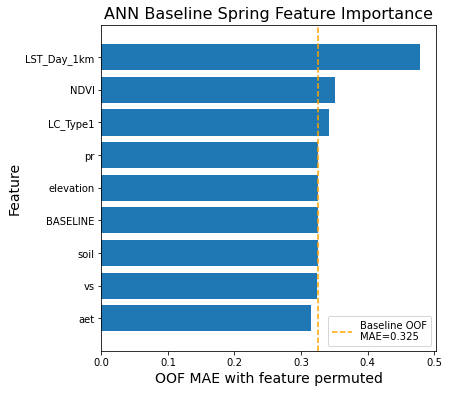

LST_Day_1km: 0.43761950865876015
pr: 0.28590425294488037
LC_Type1: 0.2950586118346109
NDVI: 0.2959305210880969
elevation: 0.3175910342242014
vs: 0.29422666456541874
soil: 0.2837914038652404
aet: 0.30329439253193413


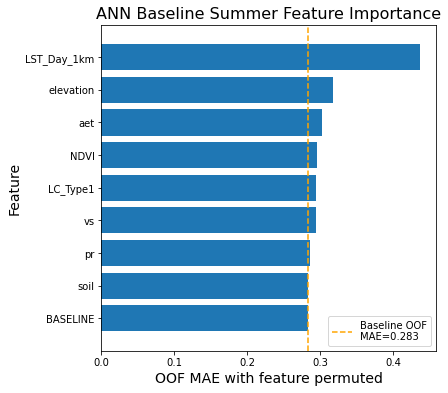

LST_Day_1km: 0.3823394288492607
pr: 0.33446850911510106
LC_Type1: 0.3557073170678101
NDVI: 0.3553829684295503
elevation: 0.3898459434657768
vs: 0.34351340195911084
soil: 0.32932158025736197
aet: 0.3292813645966999


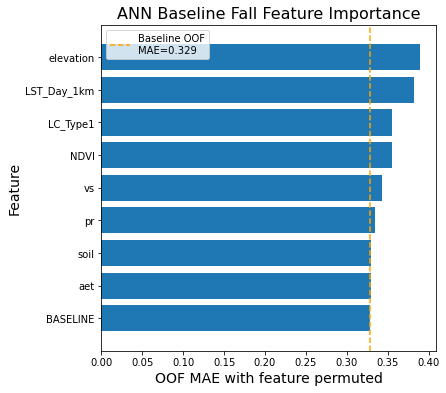

In [55]:
analyze_ann_feature_importance(model_ann_baseline_list, 'ANN Baseline', False)

LST_Day_1km: 0.4460746906347534
pr: 0.29141530579334357
LC_Type1: 0.32098664761714946
NDVI: 0.3229649901583131
elevation: 0.2978906000003917
vs: 0.2922141943410194
soil: 0.2933593075807827
aet: 0.2910573651183707


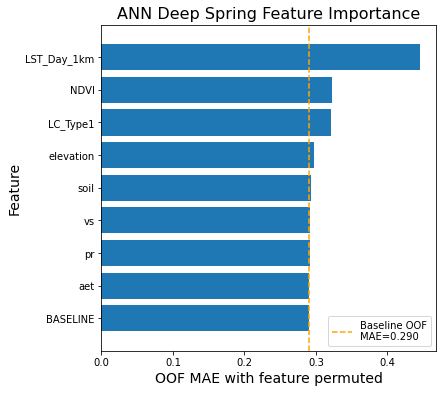

LST_Day_1km: 0.4169542513184475
pr: 0.29313096270461303
LC_Type1: 0.3006944172883982
NDVI: 0.2936204522140249
elevation: 0.3323696595722703
vs: 0.30208697845286225
soil: 0.29062972792776615
aet: 0.30108815463684624


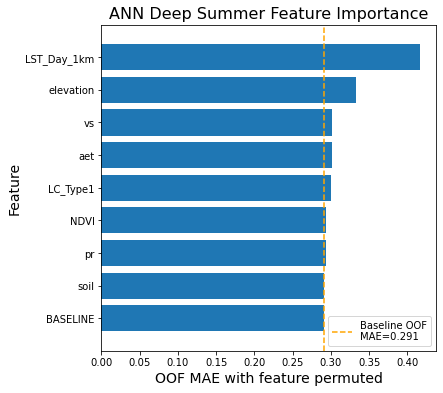

LST_Day_1km: 0.368938760509202
pr: 0.3407013412901201
LC_Type1: 0.3422184469643416
NDVI: 0.3517017738926825
elevation: 0.3899797698781731
vs: 0.32667544343993654
soil: 0.3224608369471423
aet: 0.3299794602712704


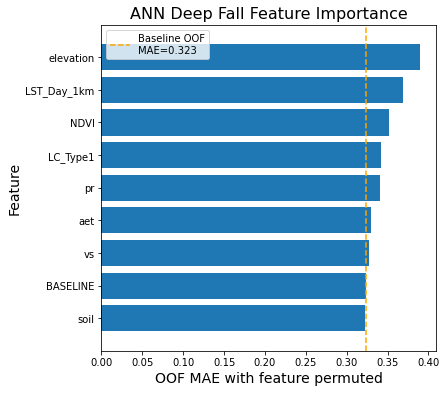

In [56]:
analyze_ann_feature_importance(model_ann_deep_list, 'ANN Deep', True)

# Fine tune deeper model

In [110]:
import keras_tuner 


def call_existing_code(units_0, layer_num, activation, dropout, dropout_rate, lr):
    model = keras.Sequential()
    model.add(layers.Dense(units=units_0, input_dim=NUM_INPUTS, activation='relu', name='Dense0'))
    cur_layer = 1
    while(cur_layer < layer_num):
        model.add(layers.Dense(
            units=hp.Int(f"units_{cur_layer}", min_value=32, max_value=512, step=32), 
            activation='relu', 
            name=f'Dense{cur_layer}'))
        if dropout:
            model.add(layers.Dropout(rate=dropout_rate))
        model.add(layers.BatchNormalization())
        cur_layer += 1
    model.add(layers.Dense(1, activation = 'sigmoid', name='Output'))
    model.compile(
        optimizer = keras.optimizers.Adam(learning_rate=lr), 
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name=all_metric_names[0]), 
            tf.keras.metrics.Recall(name=all_metric_names[1]),
            tf.keras.metrics.AUC(name=all_metric_names[2]),
            tf.keras.metrics.FalseNegatives(name=all_metric_names[3])], 
        loss ='binary_crossentropy',
    )
    return model


def build_model(hp):
    layer_num = hp.Int("layer_num", min_value=1, max_value=6, step=1)
    units_0 = hp.Int("units_0", min_value=32, max_value=512, step=32)
    activation = hp.Choice("activation", ["relu", "elu"])
    dropout = hp.Boolean("dropout")
    dropout_rate = hp.Float("dropout_rate", min_value=0.05, max_value=0.25, step=0.05)
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    
    model = call_existing_code(
        units_0=units_0, layer_num=layer_num, activation=activation, dropout=dropout, dropout_rate=dropout_rate, lr=lr
    )
    return model

In [111]:
hp = keras_tuner.HyperParameters()

In [119]:
def get_random_search_instance(objective, season_name, overwrite=False):
    metric_name = ''
    if isinstance(objective, str):
        metric_name = objective
    else:
        for i, objective_tune in enumerate(objective):
            if i != 0:
                metric_name += '_'
            metric_name += objective_tune.name
    return keras_tuner.RandomSearch(
        hypermodel=build_model,
        objective=objective,
        max_trials=10,
        overwrite=overwrite,
        directory="./model/finetune",
        project_name=f"finetune_{metric_name}_{season_name}",
    )

In [114]:
def start_fine_tune(objective, epochs=10):
    for i, (train_dataset, eval_dataset) in enumerate(zip(train_dataset_list, eval_dataset_list)):
        tf.keras.backend.clear_session()
        tuner = get_random_search_instance(objective, NAME_SEASON[i], True)
        tuner.search(train_dataset, validation_data=eval_dataset, epochs=epochs)

In [115]:
def load_best_model(objective):
    model_ann_finetuned_list = []
    for i, (train_dataset, eval_dataset) in enumerate(zip(train_dataset_list, eval_dataset_list)):
        tf.keras.backend.clear_session()
        tuner = get_random_search_instance(objective, NAME_SEASON[i], False)
        models = tuner.get_best_models()
        best_model = models[0]
        best_model.build()
        best_model.summary()
        model_ann_finetuned_list.append(best_model)
    return model_ann_finetuned_list

In [116]:
def predict_with_best_model(model_finetuned_list):
    predict_label_list = generate_predict_list(model_finetuned_list, test_dataset_input_list)
    plot_confusion_matrix(test_dataset_label_list, predict_label_list)

## Fine tune with objective as 'val_Recall'

In [100]:
finetune_objective = "val_Recall"

### Fine tune

In [81]:
start_fine_tune(finetune_objective)

Trial 10 Complete [00h 00m 24s]
val_Recall: 0.9897660613059998

Best val_Recall So Far: 1.0
Total elapsed time: 00h 04m 03s


### Load best results and predict

Reloading Tuner from ./model/finetune/finetune_val_Recall_Spring/tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense0 (Dense)              (None, 512)               4608      
                                                                 
 Dense1 (Dense)              (None, 32)                16416     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 Dense2 (Dense)              (None, 32)                1056      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                             

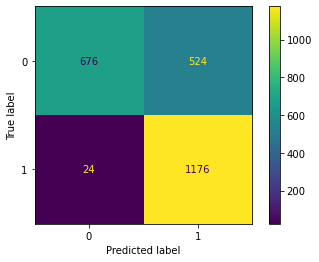

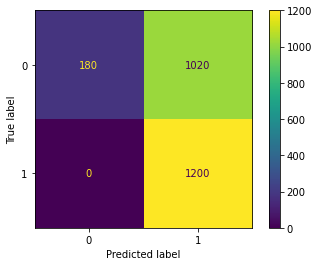

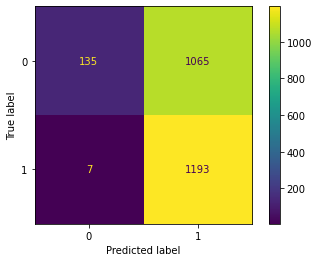

In [101]:
finetuned_recall_model_list = load_best_model(finetune_objective)
predict_with_best_model(finetuned_recall_model_list)

## Fine tune with objective as 'val_Accuracy'

In [102]:
finetune_objective = "val_Accuracy"

### Fine tune

In [92]:
start_fine_tune(finetune_objective)

Trial 10 Complete [00h 00m 25s]
val_Accuracy: 0.8559941649436951

Best val_Accuracy So Far: 0.8728070259094238
Total elapsed time: 00h 04m 16s


### Load best results and predict

Reloading Tuner from ./model/finetune/finetune_val_Accuracy_Spring/tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense0 (Dense)              (None, 416)               3744      
                                                                 
 Dense1 (Dense)              (None, 32)                13344     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 Dense2 (Dense)              (None, 32)                1056      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                           

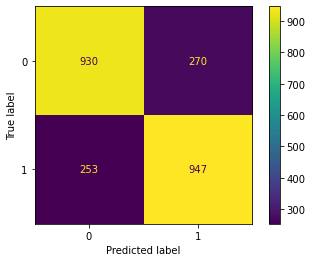

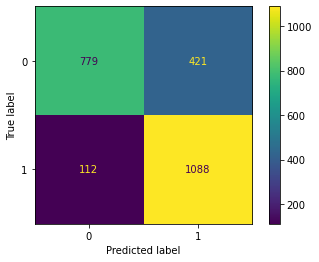

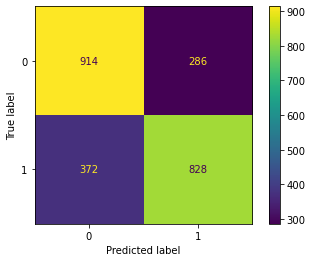

In [103]:
finetuned_recall_model_list = load_best_model(finetune_objective)
predict_with_best_model(finetuned_recall_model_list)

## Fine tune with both 'val_Accuracy', 'val_Recall' and 'val_AUC'

In [117]:
finetune_objective = [
    keras_tuner.Objective('val_Accuracy', "max"), 
    keras_tuner.Objective('val_Recall', "max"), 
    keras_tuner.Objective('val_AUC', "max")]

### Fine tune

In [120]:
start_fine_tune(finetune_objective)

Trial 10 Complete [00h 00m 27s]
multi_objective: -2.655108630657196

Best multi_objective So Far: -2.7444043159484863
Total elapsed time: 00h 04m 06s


### Load best results and predict

Reloading Tuner from ./model/finetune/finetune_val_Accuracy_val_Recall_val_AUC_Spring/tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense0 (Dense)              (None, 256)               2304      
                                                                 
 Dense1 (Dense)              (None, 32)                8224      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 10,689
Trainable params: 10,625
Non-trainable params: 64
_________________________________________________________________
Reloading Tuner fro

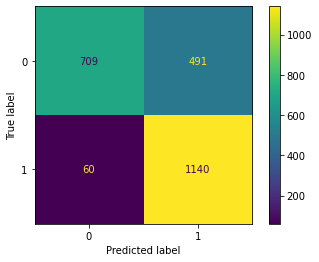

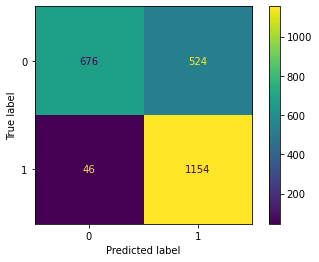

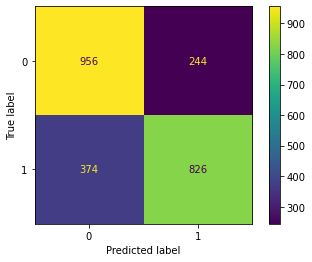

In [121]:
finetuned_recall_model_list = load_best_model(finetune_objective)
predict_with_best_model(finetuned_recall_model_list)

# FTTransformer

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from fttransformer.utils.preprocessing import df_to_dataset, build_categorical_prep
from fttransformer.models.fttransformer import FTTransformerEncoder, FTTransformer

In [10]:
NUM_INPUTS = len(feature_list)
LABEL = fire_class_band
BANDS = []
for feature in feature_list:
  BANDS += [feature['band']]
FEATURE_NAMES = BANDS + [LABEL]

NUMERIC_FEATURES = []
CATEGORICAL_FEATURES = []

def separate_feature():
    for band in BANDS:
        if band == 'LC_Type1':
            CATEGORICAL_FEATURES.append(band)
        else:
            NUMERIC_FEATURES.append(band)
separate_feature()
print(NUMERIC_FEATURES)

columns = [tf.io.FixedLenFeature(shape=[], dtype=tf.float32) for k in FEATURE_NAMES]
FEATURES_DICT = dict(zip(FEATURE_NAMES, columns))
print(FEATURES_DICT)

BATCH_SIZE = 32

CSV_EXPORT_FOLDER = 'processed_datasets/'

['LST_Day_1km', 'pr', 'NDVI', 'elevation', 'vs', 'soil', 'aet']
{'LST_Day_1km': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'pr': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'LC_Type1': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'NDVI': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'elevation': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'vs': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'soil': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'aet': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None), 'is_fire': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None)}


## Parse tfrecord and export preprocessed data

In [11]:
def parse_tfrecord(example_proto):
    """The parsing function.
    Read a serialized example into the structure defined by FEATURES_DICT.
    Args:
    example_proto: a serialized Example.
    Returns:
    A dictionary of tensors, keyed by feature name.
    """
    parsed_features = tf.io.parse_single_example(example_proto, FEATURES_DICT)
    return parsed_features

def get_dataset_df(pattern):
    """Function to read, parse and format to tuple a set of input tfrecord files.
    Get all the files matching the pattern, parse and convert to tuple.
    Args:
    pattern: A file pattern to match in a Cloud Storage bucket.
    Returns:
    A tf.data.Dataset
    """
    print(pattern)
    glob = tf.io.gfile.glob(pattern)
    dataset = tf.data.TFRecordDataset(glob, compression_type='GZIP')
    dataset = dataset.map(parse_tfrecord, num_parallel_calls=5)
    return tfds.as_dataframe(dataset)

In [12]:
train_dataset_spring = get_dataset_df(f'{TRAINING_OUTPUT_PATH}Spring*')
train_dataset_summer = get_dataset_df(f'{TRAINING_OUTPUT_PATH}Summer*')
train_dataset_fall = get_dataset_df(f'{TRAINING_OUTPUT_PATH}Fall*')
print(train_dataset_spring.head())
train_dataset_all_seasons = [train_dataset_spring, train_dataset_summer, train_dataset_fall]

./training_export/Spring*
./training_export/Summer*
./training_export/Fall*
   LC_Type1  LST_Day_1km      NDVI    aet  elevation  is_fire    pr   soil  \
0      15.0      12321.0 -0.035837    0.0      984.0      0.0   6.0  500.0   
1       4.0      13989.5  0.115423  118.0      815.0      0.0  17.0  740.0   
2       8.0      13761.5 -0.020407   21.0      324.0      0.0   8.0  606.0   
3       5.0      14037.5  0.293770    0.0      392.0      0.0  57.0  745.0   
4       7.0      13397.0 -0.005315    0.0       72.0      0.0  21.0  178.0   

      vs  
0  280.0  
1  280.0  
2  350.0  
3  400.0  
4  500.0  


In [13]:
from sklearn.preprocessing import (MinMaxScaler, RobustScaler)

def get_normalize_features(numerical_feature_list, fit_target, transform_list):
    norm = RobustScaler().fit(fit_target[numerical_feature_list])
    norm_list=[]
    for transform_target in transform_list:
        transformed = transform_target.copy()
        transformed[numerical_feature_list] = norm.transform(transform_target[numerical_feature_list])
        norm_list.append(transformed)
    
    return norm_list

In [ ]:
for season, train_set, test_set in zip(NAME_SEASON, train_dataset_all_seasons, test_dataset_all_seasons):
    [train_norm, test_norm] = get_normalize_features(NUMERIC_FEATURES, train_set, [train_set, test_set])
    print(train_norm.head())
    print(test_norm.head())
    test_norm.to_csv(f'{CSV_EXPORT_FOLDER}{season}_test_set.csv', index=False)    
    train_norm.to_csv(f'{CSV_EXPORT_FOLDER}{season}_train_set.csv', index=False) 

## Read normalized dataset from disk

In [16]:
from sklearn.model_selection import train_test_split
train_all_season = []
val_all_season = []
test_all_season = []

for season in NAME_SEASON:
    df = pd.read_csv(f'{CSV_EXPORT_FOLDER}{season}_train_set.csv')
    df[CATEGORICAL_FEATURES] = df[CATEGORICAL_FEATURES].astype(str)
    data_tr, data_val = train_test_split(df, test_size=0.2)
    train_all_season.append(data_tr)
    val_all_season.append(data_val)
    df = pd.read_csv(f'{CSV_EXPORT_FOLDER}{season}_test_set.csv')
    df[CATEGORICAL_FEATURES] = df[CATEGORICAL_FEATURES].astype(str)
    test_all_season.append(df)
    print(f'{season}: \
          {len(train_all_season[len(train_all_season)-1])},\
          {len(val_all_season[len(val_all_season)-1])}, \
          {len(test_all_season[len(test_all_season)-1])}')

Spring:           5760,          1440,           2400
Summer:           5760,          1440,           2400
Fall:           5760,          1440,           2400


In [17]:
def get_batched_data(df_tr, df_val, batch_size=256):
    tfds_train = df_to_dataset(df_tr[FEATURE_NAMES], LABEL, shuffle=True, batch_size=batch_size)
    tfds_val = df_to_dataset(df_val[FEATURE_NAMES], LABEL, shuffle=False, batch_size=batch_size)
    return tfds_train, tfds_val

In [18]:
from fttransformer.models.fttransformer import FTTransformerEncoder, FTTransformer

def call_existing_code(
    df_train,
    d_embedding:int, 
    n_layers:int, 
    ffn_factor:float, 
    attention_dropout:float, 
    ffn_dropout:float, 
    residual_dropout:float, 
    weight_decay:float, 
    lr:float):
    
    ft_linear_encoder = FTTransformerEncoder(
        numerical_features=NUMERIC_FEATURES,  # list of numeric features
        categorical_features=CATEGORICAL_FEATURES,  # list of numeric features
        numerical_data=df_train[NUMERIC_FEATURES].values,
        categorical_data=df_train[CATEGORICAL_FEATURES].values,
        y = None,
        numerical_embedding_type='linear',
        embedding_dim=d_embedding,
        depth=n_layers,
        ffn_factor=ffn_factor,
        attn_dropout=attention_dropout,
        ff_dropout=ffn_dropout,
        residual_dropout=residual_dropout,
        explainable=True
    )

    ft_model = FTTransformer(
        encoder=ft_linear_encoder,  # Encoder from above
        out_dim=1,  # Number of outputs in final layer
        out_activation='sigmoid',  # Activation function for final layer
    )
    
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr, weight_decay=weight_decay
    )

    ft_model.compile(
        optimizer = optimizer,
        # metrics=[
        #     # tf.keras.metrics.BinaryAccuracy(name=all_metric_names[0]), 
        #     tf.keras.metrics.Recall(name=all_metric_names[1]),
        #     tf.keras.metrics.AUC(name=all_metric_names[2]),
        #     # tf.keras.metrics.FalseNegatives(name=all_metric_names[3])
        # ], 
        metrics= {"output": [
            tf.keras.metrics.BinaryAccuracy(name=all_metric_names[0]),
            tf.keras.metrics.Recall(name=all_metric_names[1]),
            tf.keras.metrics.AUC(name=all_metric_names[2], curve='PR'),
            tf.keras.metrics.FalseNegatives(name=all_metric_names[3])
        ], "importances": None},
        loss = {"output": tf.keras.losses.BinaryCrossentropy(), "importances": None},
    )
    
    return ft_model

In [30]:
def call_default_ft(df_train, data_train, data_val):
    lr = 0.001
    weight_decay = 0.0001
    ft_model = call_existing_code(
        df_train,
        d_embedding=32, 
        n_layers=4, 
        ffn_factor=1,
        attention_dropout=0.1,
        ffn_dropout=0.1,
        residual_dropout=0.0,
        weight_decay=weight_decay,
        lr=lr
    )
    epochs = 200
    
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor="val_output_Accuracy", mode="max", patience=20, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint(
            filepath=f'{MODEL_SAVE_PATH}{MODEL_NAME}',
            save_weights_only=True,
            save_freq='epoch')
    ]
    history = ft_model.fit(
        data_train, 
        epochs=epochs, 
        validation_data=data_val,
        callbacks=[callbacks]
    )
    return ft_model, history

In [19]:
all_metric_names = ['Accuracy', 'Recall', 'AUC', 'FalseNegatives']
prefix = 'output_'
def plot_metrics(history, metric_name, plot_title):
    if f'{prefix}{metric_name}' not in history.history:
        print()
        return
    plt.figure(figsize=(6, 4))
    plt.plot(history.history[f'{prefix}{metric_name}'], label=f'training {metric_name}')
    plt.plot(history.history[f'val_{prefix}{metric_name}'], label=f'validation {metric_name}')
    plt.xlabel('Epoch')
    plt.ylabel(f'{metric_name}')
    plt.title(f'Training and Validation {plot_title} {metric_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_model_history(history, plot_title):
    for metric_name in all_metric_names:
        plot_metrics(history, metric_name, plot_title)

(5760, 9)
(1440, 9)
Epoch 1/200


/home/zheng.yant/Capstone/fttransformer/utils/preprocessing.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]
/home/zheng.yant/Capstone/fttransformer/utils/preprocessing.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]


23/23 [==============================] - 13s 204ms/step - loss: 0.4981 - output_loss: 0.4981 - output_Accuracy: 0.7625 - output_Recall: 0.7995 - output_AUC: 0.8180 - output_FalseNegatives: 585.0000 - val_loss: 0.4278 - val_output_loss: 0.4278 - val_output_Accuracy: 0.8042 - val_output_Recall: 0.7947 - val_output_AUC: 0.8728 - val_output_FalseNegatives: 140.0000
Epoch 2/200
23/23 [==============================] - 3s 124ms/step - loss: 0.4311 - output_loss: 0.4311 - output_Accuracy: 0.8054 - output_Recall: 0.8245 - output_AUC: 0.8666 - output_FalseNegatives: 512.0000 - val_loss: 0.4108 - val_output_loss: 0.4108 - val_output_Accuracy: 0.8028 - val_output_Recall: 0.8930 - val_output_AUC: 0.8725 - val_output_FalseNegatives: 73.0000
Epoch 3/200
23/23 [==============================] - 4s 176ms/step - loss: 0.4237 - output_loss: 0.4237 - output_Accuracy: 0.7986 - output_Recall: 0.8160 - output_AUC: 0.8770 - output_FalseNegatives: 537.0000 - val_loss: 0.3973 - val_output_loss: 0.3973 - val_ou

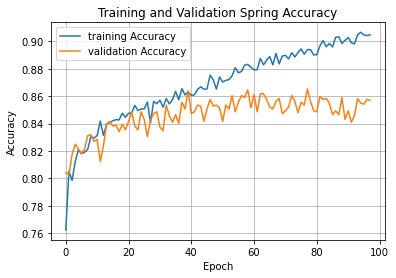

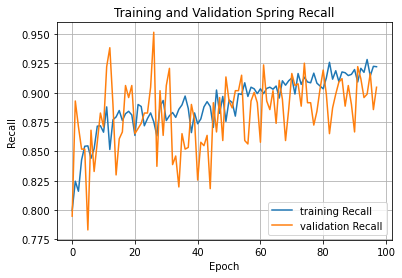

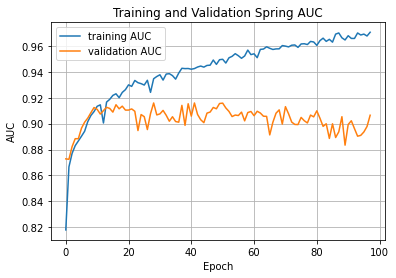

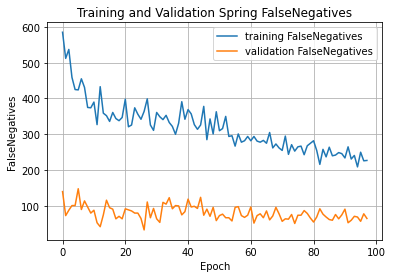

(5760, 9)
(1440, 9)
Epoch 1/200


/home/zheng.yant/Capstone/fttransformer/utils/preprocessing.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]
/home/zheng.yant/Capstone/fttransformer/utils/preprocessing.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]


23/23 [==============================] - 12s 181ms/step - loss: 0.5178 - output_loss: 0.5178 - output_Accuracy: 0.7483 - output_Recall: 0.8421 - output_AUC: 0.7599 - output_FalseNegatives: 454.0000 - val_loss: 0.4486 - val_output_loss: 0.4486 - val_output_Accuracy: 0.7910 - val_output_Recall: 0.8494 - val_output_AUC: 0.8123 - val_output_FalseNegatives: 109.0000
Epoch 2/200
23/23 [==============================] - 4s 161ms/step - loss: 0.4367 - output_loss: 0.4367 - output_Accuracy: 0.7977 - output_Recall: 0.8731 - output_AUC: 0.8249 - output_FalseNegatives: 365.0000 - val_loss: 0.4278 - val_output_loss: 0.4278 - val_output_Accuracy: 0.8042 - val_output_Recall: 0.8315 - val_output_AUC: 0.8269 - val_output_FalseNegatives: 122.0000
Epoch 3/200
23/23 [==============================] - 3s 132ms/step - loss: 0.4255 - output_loss: 0.4255 - output_Accuracy: 0.8024 - output_Recall: 0.8800 - output_AUC: 0.8361 - output_FalseNegatives: 345.0000 - val_loss: 0.4105 - val_output_loss: 0.4105 - val_o

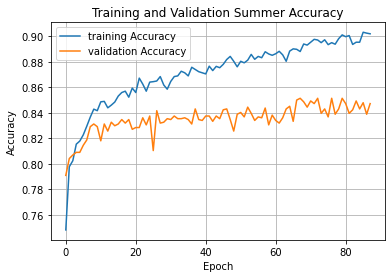

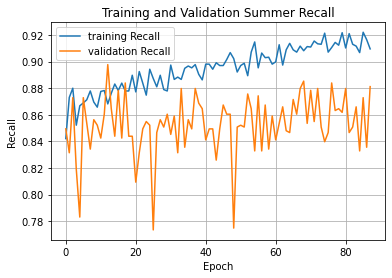

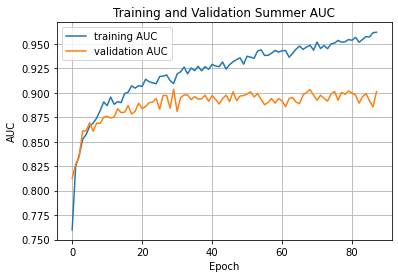

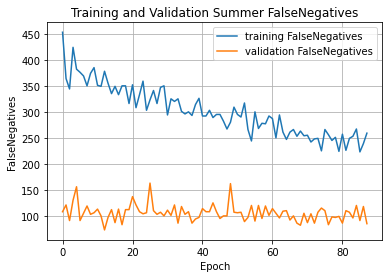

(5760, 9)
(1440, 9)
Epoch 1/200


/home/zheng.yant/Capstone/fttransformer/utils/preprocessing.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]
/home/zheng.yant/Capstone/fttransformer/utils/preprocessing.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]


23/23 [==============================] - 12s 196ms/step - loss: 0.4516 - output_loss: 0.4516 - output_Accuracy: 0.7964 - output_Recall: 0.8486 - output_AUC: 0.8265 - output_FalseNegatives: 438.0000 - val_loss: 0.3504 - val_output_loss: 0.3504 - val_output_Accuracy: 0.8660 - val_output_Recall: 0.9194 - val_output_AUC: 0.8809 - val_output_FalseNegatives: 57.0000
Epoch 2/200
23/23 [==============================] - 4s 154ms/step - loss: 0.3781 - output_loss: 0.3781 - output_Accuracy: 0.8465 - output_Recall: 0.8856 - output_AUC: 0.8766 - output_FalseNegatives: 331.0000 - val_loss: 0.3275 - val_output_loss: 0.3275 - val_output_Accuracy: 0.8674 - val_output_Recall: 0.9463 - val_output_AUC: 0.8971 - val_output_FalseNegatives: 38.0000
Epoch 3/200
23/23 [==============================] - 4s 152ms/step - loss: 0.3536 - output_loss: 0.3536 - output_Accuracy: 0.8585 - output_Recall: 0.9022 - output_AUC: 0.8930 - output_FalseNegatives: 283.0000 - val_loss: 0.3156 - val_output_loss: 0.3156 - val_out

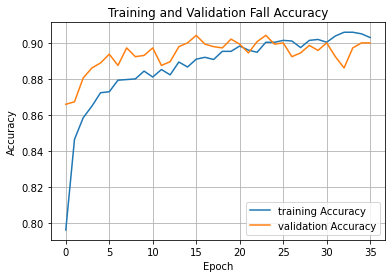

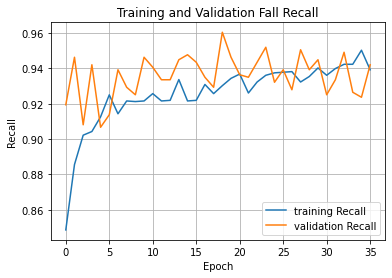

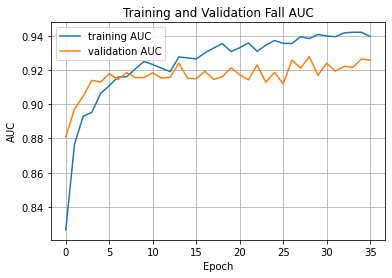

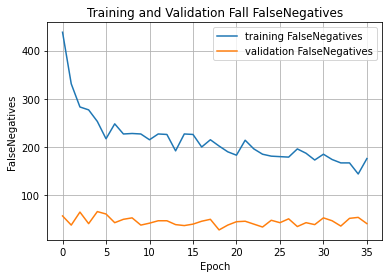

In [33]:
MODEL_SAVE_PATH = 'model/'
MODEL_NAME = 'ftmodel_baseline'
ftmodel_baseline_list = []
for season, train_df, val_df in zip(NAME_SEASON, train_all_season, val_all_season):
    tf.keras.backend.clear_session()    
    print(train_df.shape)
    print(val_df.shape)
    tfds_train, tfds_val = get_batched_data(train_df, val_df)
    model, history = call_default_ft(train_df, tfds_train, tfds_val)
    ftmodel_baseline_list.append(model)
    plot_model_history(history, season)

In [36]:
save_model(ftmodel_baseline_list, MODEL_NAME)

model/ftmodel_baseline/Spring


INFO:tensorflow:Assets written to: model/ftmodel_baseline/Spring/assets


INFO:tensorflow:Assets written to: model/ftmodel_baseline/Spring/assets


model/ftmodel_baseline/Summer


INFO:tensorflow:Assets written to: model/ftmodel_baseline/Summer/assets


INFO:tensorflow:Assets written to: model/ftmodel_baseline/Summer/assets


model/ftmodel_baseline/Fall


INFO:tensorflow:Assets written to: model/ftmodel_baseline/Fall/assets


INFO:tensorflow:Assets written to: model/ftmodel_baseline/Fall/assets


## Predict

In [87]:
test_dataset_input_list = []
test_dataset_label_list = []
for dataset in test_all_season:
    dataset_tf = df_to_dataset(dataset[BANDS], shuffle=False, batch_size=1)
    test_dataset_input_list.append(dataset_tf)
    test_dataset_label_list.append(dataset[[LABEL]])

/home/zheng.yant/Capstone/fttransformer/utils/preprocessing.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]
/home/zheng.yant/Capstone/fttransformer/utils/preprocessing.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]
/home/zheng.yant/Capstone/fttransformer/utils/preprocessing.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]


In [40]:
MODEL_NAME = 'ftmodel_baseline'
model_fttransformer_baseline_list = get_model_from_path(MODEL_NAME)

In [ ]:
predict_ftbaseline_list = generate_predict_list(model_fttransformer_baseline_list, test_dataset_input_list)

In [93]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, recall_score
from fttransformer.utils.helper import get_model_importances

def evaluate_result(actual_label_list, predict_label_list):
    for season, actual, prediction in zip(NAME_SEASON, actual_label_list, predict_label_list):
        print(season)
        print("Test Accuracy:", np.round(accuracy_score(actual, prediction['output'].ravel()>0.5), 4))
        print("Test Recall:", np.round(recall_score(actual, prediction['output'].ravel()>0.5), 4))
        print("Test ROC AUC:", np.round(roc_auc_score(actual, prediction['output'].ravel()), 4))
        print("Test PR AUC:", np.round(average_precision_score(actual, prediction['output'].ravel()), 4))
        
def plot_feature_importance(actual_label_list, predict_label_list):
    for season, actual, prediction in zip(NAME_SEASON, actual_label_list, predict_label_list):
        linear_importances = prediction['importances']
        linear_importances_df = pd.DataFrame(linear_importances[:, :-1], columns = BANDS)
        linear_total_importances = get_model_importances(
            linear_importances_df, title=f"{season} Importances for FT-Transformer with Linear Numerical Embedddings"
        )
        print(f"{season}")        
        print(linear_total_importances)

Spring
Test Accuracy: 0.7679
Test Recall: 0.6933
Test ROC AUC: 0.8736
Test PR AUC: 0.8626
Summer
Test Accuracy: 0.7896
Test Recall: 0.8092
Test ROC AUC: 0.8761
Test PR AUC: 0.8472
Fall
Test Accuracy: 0.8096
Test Recall: 0.7442
Test ROC AUC: 0.8847
Test PR AUC: 0.8479


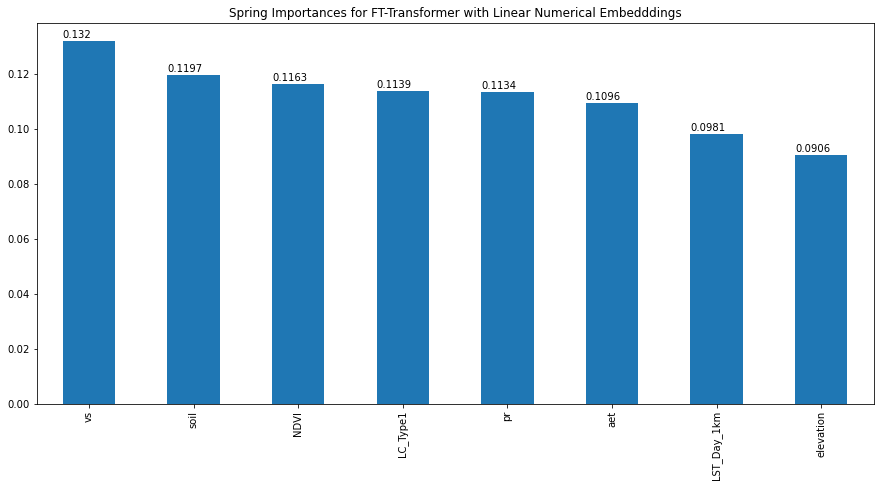

Spring
vs             0.131965
soil           0.119733
NDVI           0.116321
LC_Type1       0.113875
pr             0.113369
aet            0.109573
LST_Day_1km    0.098148
elevation      0.090639
dtype: float32


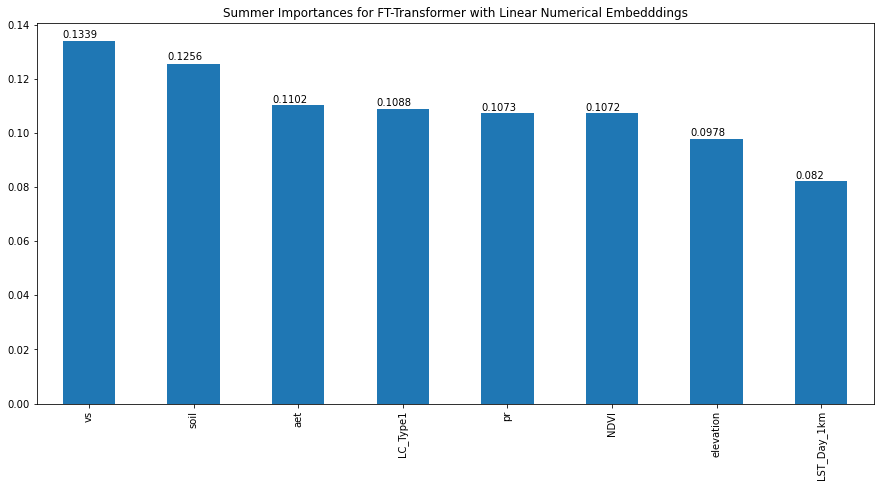

Summer
vs             0.133895
soil           0.125636
aet            0.110185
LC_Type1       0.108850
pr             0.107256
NDVI           0.107223
elevation      0.097839
LST_Day_1km    0.082047
dtype: float32


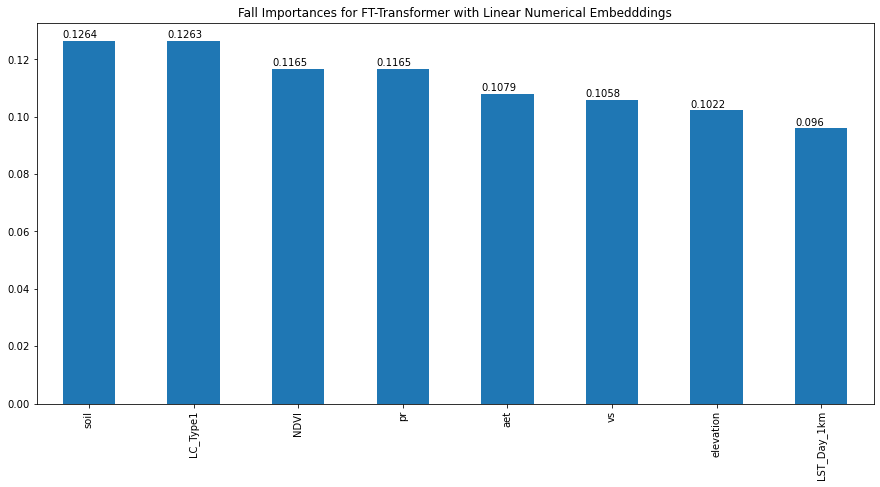

Fall
soil           0.126368
LC_Type1       0.126272
NDVI           0.116500
pr             0.116496
aet            0.107946
vs             0.105842
elevation      0.102245
LST_Day_1km    0.096044
dtype: float32


In [51]:
evaluate_result(test_dataset_label_list, predict_ftbaseline_list)
plot_feature_importance(test_dataset_label_list, predict_ftbaseline_list)

## Fine tune FTTransformer

In [28]:
import keras_tuner 

class MyHyperModel(keras_tuner.HyperModel):
    def __init__(self, df_train):
        self.df_train = df_train
        
    def build(self, hp):
        d_embedding = hp.Int("d_embedding", min_value=32, max_value=512, step=8)
        n_layers = hp.Int("n_layers", min_value=1, max_value=4)
        ffn_factor = hp.Float("ffn_factor", min_value=2/3, max_value=8/3, sampling="linear")
        attention_dropout = hp.Float("attention_dropout", min_value=0.0, max_value=0.5, sampling="linear")
        ffn_dropout = hp.Float("ffn_dropout", min_value=0.0, max_value=0.5, sampling="linear")
        residual_dropout = hp.Float("residual_dropout", min_value=0.0, max_value=0.2, default=0.0, sampling="linear")

        lr = hp.Float("lr", min_value=1e-5, max_value=1e-2, sampling="log")
        weight_decay = hp.Float("weight_decay", min_value=1e-6, max_value=1e-3, sampling="log")

        model = call_existing_code(
            self.df_train,
            d_embedding=d_embedding, 
            n_layers=n_layers, 
            ffn_factor=ffn_factor,
            attention_dropout=attention_dropout,
            ffn_dropout=ffn_dropout,
            residual_dropout=residual_dropout,
            weight_decay=weight_decay,
            lr=lr
        )
        return model

In [21]:
def get_random_search_instance(objective, hp, df_train, season_name, overwrite=False):
    metric_name = ''
    if isinstance(objective, str):
        metric_name = objective
    else:
        for i, objective_tune in enumerate(objective):
            if i != 0:
                metric_name += '_'
            metric_name += objective_tune.name
    m = MyHyperModel(df_train)
    return keras_tuner.RandomSearch(
        hypermodel=m,
        objective=objective,
        max_trials=30,
        overwrite=overwrite,
        directory="./model/finetune-fttransformer",
        project_name=f"finetune_{metric_name}_{season_name}",
    )

In [22]:
def start_fine_tune(objective, epochs=10):
    for season, train_df, val_df in zip(NAME_SEASON, train_all_season, val_all_season):
        tf.keras.backend.clear_session()    
        hp = keras_tuner.HyperParameters()        
        tfds_train, tfds_val = get_batched_data(train_df, val_df)
        tuner = get_random_search_instance(objective, hp, train_df, season, True)
        tuner.search(tfds_train, validation_data=tfds_val, epochs=epochs)

In [85]:
def load_best_model(objective):
    best_models = []
    for season, train_df, val_df in zip(NAME_SEASON, train_all_season, val_all_season):
        tf.keras.backend.clear_session()
        tfds_train, tfds_val = get_batched_data(train_df, val_df)
        hp = keras_tuner.HyperParameters()        
        tuner = get_random_search_instance(objective, hp, train_df, season, False)
        models = tuner.get_best_models()
        best_model = models[0]
        input_tensors ={}
        for key,value in tfds_train.element_spec[0].items():
            input_tensors[key] = tf.keras.layers.Input(type_spec = value)
            shape = value.shape
        best_model.call(input_tensors)
        # best_model.build(shape)
        # best_model.summary()
        best_models.append(best_model)
    return best_models

In [24]:
def resume_tuning(objective, epochs=10):
    for season, train_df, val_df in zip(NAME_SEASON, train_all_season, val_all_season):
        tf.keras.backend.clear_session()    
        tfds_train, tfds_val = get_batched_data(train_df, val_df)
        hp = keras_tuner.HyperParameters()        
        tuner = get_random_search_instance(objective, hp, train_df, season, False)
        tuner.search(tfds_train, validation_data=tfds_val, epochs=epochs)

In [25]:
finetune_objective = [
    keras_tuner.Objective('val_output_Accuracy', "max"),
    keras_tuner.Objective('val_output_Recall', "max"),
]

In [ ]:
start_fine_tune(finetune_objective, epochs=20)

Trial 4 Complete [00h 00m 48s]
multi_objective: -1.7373504042625427

Best multi_objective So Far: -1.745652973651886
Total elapsed time: 00h 19m 02s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
376               |152               |d_embedding
3                 |4                 |n_layers
1.3575            |1.6925            |ffn_factor
0.28348           |0.12804           |attention_dropout
0.095991          |0.062009          |ffn_dropout
0.10342           |0.054302          |residual_dropout
4.6197e-05        |5.2221e-05        |lr

Epoch 1/20
23/23 [==============================] - 51s 2s/step - loss: 0.5067 - output_loss: 0.5067 - output_Accuracy: 0.7519 - output_Recall: 0.8119 - output_AUC: 0.7910 - output_FalseNegatives: 541.0000 - val_loss: 0.4306 - val_output_loss: 0.4306 - val_output_Accuracy: 0.7910 - val_output_Recall: 0.9144 - val_output_AUC: 0.8551 - val_output_FalseNegatives: 62.0000
Epoch 2/20
23/23 [==============================] -

In [27]:
resume_tuning(finetune_objective, epochs=20)

Trial 30 Complete [00h 11m 13s]
multi_objective: -1.8323948979377747

Best multi_objective So Far: -1.8472222089767456
Total elapsed time: 21h 51m 40s


### Load best results and predict

In [ ]:
from fttransformer.models.fttransformer import FTTransformer
finetuned_recall_model_list = load_best_model(finetune_objective)

In [90]:
predict_ft_tuned_list = generate_predict_list(finetuned_recall_model_list, test_dataset_input_list)

2400/2400 [==============================] - 13s 5ms/step


Spring
Test Accuracy: 0.8142
Test Recall: 0.915
Test ROC AUC: 0.8978
Test PR AUC: 0.8758
Summer
Test Accuracy: 0.8271
Test Recall: 0.9033
Test ROC AUC: 0.9017
Test PR AUC: 0.8798
Fall
Test Accuracy: 0.7962
Test Recall: 0.7717
Test ROC AUC: 0.8768
Test PR AUC: 0.8535


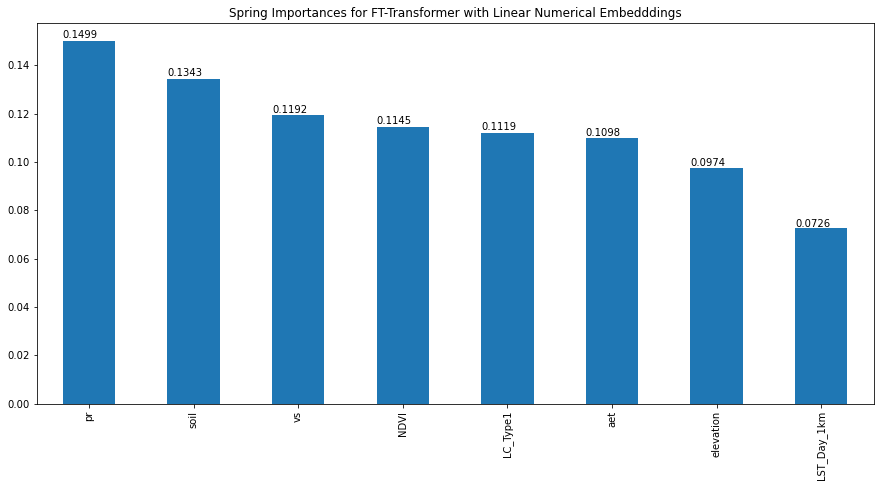

Spring
pr             0.149946
soil           0.134289
vs             0.119190
NDVI           0.114479
LC_Type1       0.111936
aet            0.109802
elevation      0.097380
LST_Day_1km    0.072550
dtype: float32


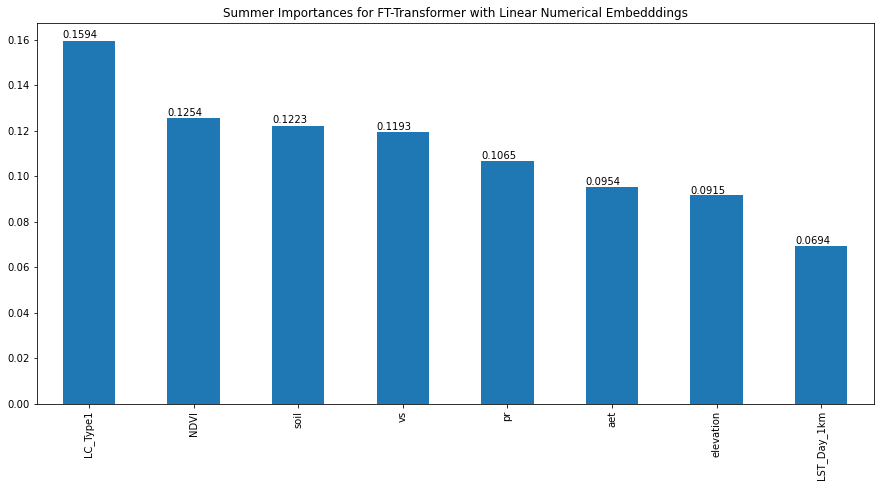

Summer
LC_Type1       0.159392
NDVI           0.125427
soil           0.122279
vs             0.119288
pr             0.106490
aet            0.095393
elevation      0.091528
LST_Day_1km    0.069396
dtype: float32


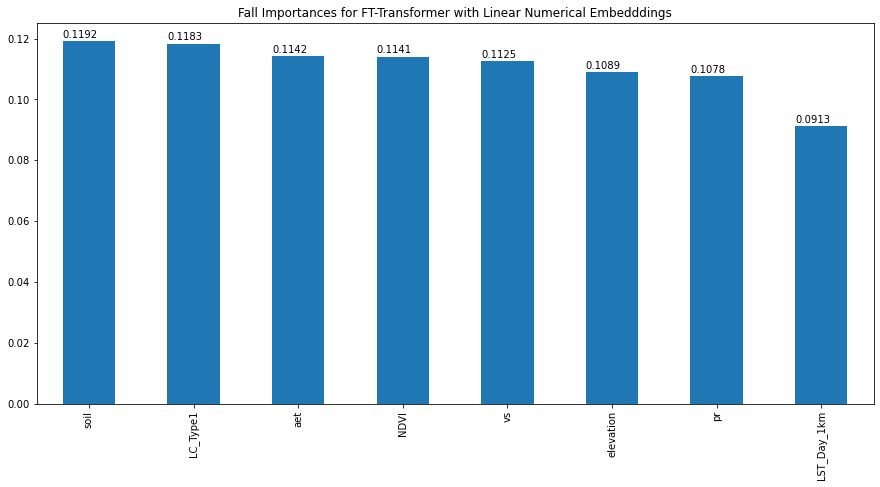

Fall
soil           0.119179
LC_Type1       0.118294
aet            0.114237
NDVI           0.114061
vs             0.112487
elevation      0.108876
pr             0.107763
LST_Day_1km    0.091349
dtype: float32


In [98]:
evaluate_result(test_dataset_label_list, predict_ft_tuned_list)
plot_feature_importance(test_dataset_label_list, predict_ft_tuned_list)

[0 0 1 ... 1 1 1]
[0. 0. 0. ... 1. 1. 1.]
Recall: 0.9150000214576721
Accuracy: 0.8141666650772095
[0 0 0 ... 0 1 1]
[0. 0. 0. ... 1. 1. 1.]
Recall: 0.909166693687439
Accuracy: 0.8206250071525574
[1 0 0 ... 1 0 1]
[0. 0. 0. ... 1. 1. 1.]
Recall: 0.8633333444595337
Accuracy: 0.8125


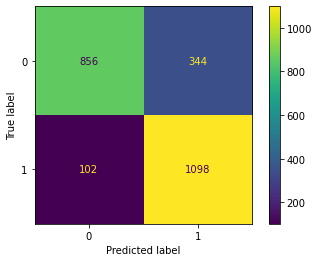

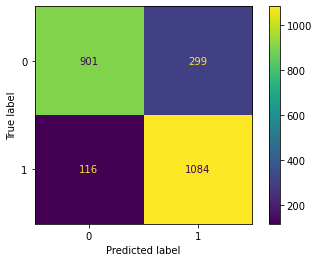

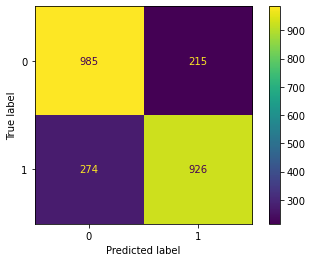

In [111]:
def plot_confusion_matrix(test_dataset_label_list, predict_ft_tuned_list):
    metric_list = [metrics.Recall(name = 'Recall'), metrics.BinaryAccuracy(name = 'Accuracy')]
    for real_labels, predict_labels in zip(test_dataset_label_list, predict_ft_tuned_list):
        real_values = real_labels['is_fire'].values
        predicted = np.array([1 if x>0.5 else 0 for x in predict_labels['output'].ravel()])
        actual = np.array([x for x in real_values])
        print(predicted)
        print(real_values)
        for m in metric_list:
            m.update_state(actual, predicted)
            print(f'{m.name}: {m.result()}')

        conf_mat = confusion_matrix(actual, predicted)
        displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
        displ.plot()

plot_confusion_matrix(test_dataset_label_list, predict_ft_tuned_list)

# aaa
